# Import all required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

print(plt.style.available)

plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.titlesize'] = 14
plt.style.use('seaborn-deep')
sns.set_palette(palette='bright')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Load the Data

In [2]:
data = pd.read_excel('innercity.xlsx')

# Check the data .head(),info()

In [3]:
data.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [4]:
data["dayhours"]=pd.to_datetime(data['dayhours'])
data.head(5)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,2015-03-17,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21571 non-null  object        
 8   coast             21612 non-null  object        
 9   sight             21556 non-null  float64       
 10  condition         21556 non-null  object        
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2161

In [6]:
data.dtypes

cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                   float64
room_bath                  float64
living_measure             float64
lot_measure                float64
ceil                        object
coast                       object
sight                      float64
condition                   object
quality                    float64
ceil_measure               float64
basement                   float64
yr_built                    object
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                        object
living_measure15           float64
lot_measure15              float64
furnished                  float64
total_area                  object
dtype: object

In [7]:
data.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64

In [8]:
print("no. of rows: ",data.shape[0], "\n""no. of columns: ",data.shape[1])

no. of rows:  21613 
no. of columns:  23


In [9]:
data['ceil'] = data['ceil'].replace('$',np.NaN)
data['coast'] = data['coast'].replace('$',np.NaN)
data['condition'] = data['condition'].replace('$',np.NaN)
data['yr_built'] = data['yr_built'].replace('$',np.NaN)
data['long'] = data['long'].replace('$',np.NaN)
data['total_area'] = data['total_area'].replace('$',np.NaN)

In [10]:
data['ceil'] = data['ceil'].astype(float)
data['coast'] = data['coast'].astype(object)
data['condition'] = data['condition'].astype(object)
data['yr_built'] = data['yr_built'].astype(float)
data['long'] = data['long'].astype(float)
data['total_area'] = data['total_area'].astype(float)
data['quality'] = data['quality'].astype(object)
data['furnished'] = data['furnished'].astype(object)
data['sight'] = data['sight'].astype(object)

In [11]:
data.head(195)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,...,1250.0,1966.0,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3145600250,2015-03-17,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,...,0.0,1948.0,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7129303070,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,0.0,1966.0,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7338220280,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,...,0.0,2009.0,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7950300670,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,...,0.0,1924.0,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,823059145,2014-10-13,321000,4.0,1.00,1300.0,18836.0,1.0,0.0,0.0,...,0.0,1941.0,0,98056,47.5029,-122.188,1540.0,8498.0,0.0,20136.0
191,1446800511,2014-10-09,249950,4.0,1.00,1330.0,7980.0,1.5,0.0,0.0,...,0.0,1952.0,0,98168,47.4920,-122.333,1570.0,8588.0,0.0,9310.0
192,3629960680,2014-09-26,395000,2.0,2.25,1620.0,1841.0,2.0,0.0,0.0,...,80.0,2004.0,0,98029,47.5483,-122.004,1530.0,1831.0,0.0,3461.0
193,1023059313,2015-02-05,390000,3.0,2.50,1910.0,4755.0,NaN,NaN,0.0,...,0.0,1997.0,0,98059,47.4956,-122.162,2460.0,6099.0,0.0,6665.0


In [12]:
data.dtypes

cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                   float64
room_bath                  float64
living_measure             float64
lot_measure                float64
ceil                       float64
coast                       object
sight                       object
condition                   object
quality                     object
ceil_measure               float64
basement                   float64
yr_built                   float64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15           float64
lot_measure15              float64
furnished                   object
total_area                 float64
dtype: object

## Checking for Missing value

In [13]:
missing_values=pd.DataFrame(data.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / data.shape[0] * 100.00,2)
missing_values

,Features,Missing count,% missing
0,cid,0,0.00
1,dayhours,0,0.00
2,price,0,0.00
3,room_bed,108,0.50
4,room_bath,108,0.50
5,living_measure,17,0.08
6,lot_measure,42,0.19
7,ceil,72,0.33
8,coast,31,0.14
9,sight,57,0.26


In [14]:
data.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data['ceil'].value_counts()

1.0    10511
2.0     8116
1.5     1884
3.0      609
2.5      160
3.5        8
Name: ceil, dtype: int64

In [17]:
data['ceil'] = np.floor(data['ceil'])

In [18]:
data['ceil'].value_counts()

1.0    12395
2.0     8276
3.0      617
Name: ceil, dtype: int64

In [19]:
# The number of floors

In [20]:
data[data['ceil']==4]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area


In [21]:
data[data['yr_built']==2015]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
501,2768100512,2015-04-22,659000,2.0,2.50,1450.0,1213.0,2.0,0.0,0.0,...,340.0,2015.0,0,98107,47.6692,-122.372,1620.0,1456.0,1.0,2663.0
1281,923059259,2015-04-01,455950,4.0,2.50,2720.0,5771.0,2.0,0.0,0.0,...,0.0,2015.0,0,98056,47.4917,-122.170,1940.0,4184.0,0.0,8491.0
1353,952005863,2015-05-05,643950,3.0,2.25,1760.0,2122.0,3.0,0.0,0.0,...,0.0,2015.0,0,98116,47.5633,-122.385,1420.0,1618.0,1.0,3882.0
2260,6169901185,2014-05-20,490000,5.0,3.50,4460.0,2975.0,3.0,0.0,2.0,...,1180.0,2015.0,0,98119,47.6313,-122.370,2490.0,4231.0,1.0,7435.0
2560,9385200045,2015-05-12,729500,3.0,2.50,1660.0,1091.0,3.0,0.0,1.0,...,130.0,2015.0,0,98116,47.5818,-122.402,1510.0,1352.0,1.0,2751.0
3050,7132300525,2015-04-11,500000,3.0,1.75,1530.0,825.0,3.0,0.0,0.0,...,0.0,2015.0,0,98144,47.5929,-122.308,1580.0,1915.0,0.0,2355.0
3975,9103000455,2015-04-24,920000,4.0,3.25,2190.0,4265.0,2.0,0.0,0.0,...,650.0,2015.0,0,98122,47.6178,-122.290,1730.0,4265.0,1.0,6455.0
4635,5694500840,2014-11-25,559000,2.0,3.00,1650.0,960.0,3.0,0.0,0.0,...,300.0,2015.0,0,98103,47.6611,-122.346,1650.0,3000.0,0.0,2610.0
4933,1832100030,2014-06-25,597326,4.0,4.00,3570.0,8250.0,2.0,0.0,0.0,...,710.0,2015.0,0,98040,47.5784,-122.226,2230.0,10000.0,1.0,11820.0
5778,8077100031,2015-04-22,631000,3.0,2.25,1670.0,1396.0,2.0,0.0,0.0,...,420.0,2015.0,0,98115,47.6814,-122.288,1610.0,5191.0,1.0,3066.0


In [22]:
data[data['living_measure15']>2360]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
2,7129303070,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,0.0,1966.0,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
7,1624059224,2014-06-18,1160000,4.0,3.50,4680.0,9700.0,2.0,0.0,0.0,...,1320.0,2005.0,0,98006,47.5703,-122.165,2800.0,12343.0,1.0,14380.0
10,7853361370,2014-05-02,555000,4.0,2.50,3310.0,6500.0,2.0,0.0,0.0,...,0.0,2012.0,0,98065,47.5150,-121.870,2380.0,5000.0,0.0,9810.0
12,7806450050,2014-10-29,480000,3.0,2.50,2450.0,28185.0,2.0,0.0,0.0,...,0.0,1990.0,0,98058,47.4665,-122.122,2440.0,33541.0,1.0,30635.0
18,7882600332,2014-08-19,968060,4.0,2.50,2620.0,16200.0,1.0,0.0,2.0,...,1050.0,1950.0,1993,98033,47.6623,-122.196,3050.0,11875.0,0.0,18820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,5318101075,2014-08-11,960000,3.0,1.75,2460.0,4800.0,1.0,0.0,0.0,...,1230.0,1938.0,0,98112,47.6343,-122.282,2860.0,4800.0,0.0,7260.0
21601,3456000160,2014-06-23,800000,3.0,2.25,2380.0,11824.0,1.0,0.0,0.0,...,930.0,1972.0,0,98040,47.5371,-122.218,2750.0,11491.0,1.0,14204.0
21604,1441600020,2014-05-27,960000,5.0,4.00,3720.0,15200.0,2.0,0.0,0.0,...,0.0,2005.0,0,98075,47.5956,-122.026,4100.0,19036.0,1.0,18920.0
21608,203600600,2015-03-10,685530,4.0,2.50,3130.0,60467.0,2.0,0.0,0.0,...,0.0,1996.0,0,98014,47.6618,-121.962,2780.0,44224.0,1.0,63597.0


In [23]:
print("no. of rows: ",data.shape[0], "\n""no. of columns: ",data.shape[1])

no. of rows:  21288 
no. of columns:  23


In [24]:
data.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

## Checking for Duplicates

In [25]:
# Are there any duplicates
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


In [26]:
data.shape

(21288, 23)

In [27]:
from scipy.stats import stats

In [28]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


### Getting the measure of how long the house has not been renovated

In [29]:

data['is_renovated'] =int(0)
for index,row in data.iterrows():
    if row['yr_renovated']!=int(0):
        data.at[index,'is_renovated']=int(1)
    
data[['yr_built','yr_renovated','is_renovated']].head(20)

,yr_built,yr_renovated,is_renovated
0,1966.0,0,0
1,1948.0,0,0
2,1966.0,0,0
3,2009.0,0,0
4,1924.0,0,0
6,2005.0,0,0
7,2005.0,0,0
8,1978.0,0,0
9,1983.0,0,0
10,2012.0,0,0


#### Getting the measure of how old is the house

In [30]:
#Getting the measure of how old is the house
data['years_old']=int(0)
for index,row in data.iterrows():
    data.at[index,'years_old']=int(row['dayhours'].strftime('%Y'))-row['yr_built']

data[['years_old']].head()

,years_old
0,49
1,67
2,48
3,5
4,91


In [31]:
#Dropping unnecessary columns
data.drop(['cid','lat','long'],axis=1,inplace=True)

In [32]:
data.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,basement,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old
0,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,...,1250.0,1966.0,0,98034,2020.0,8660.0,0.0,12490.0,0,49
1,2015-03-17,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,...,0.0,1948.0,0,98118,1660.0,4100.0,0.0,3771.0,0,67
2,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,...,0.0,1966.0,0,98118,2620.0,2433.0,0.0,5455.0,0,48
3,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,...,0.0,2009.0,0,98002,2030.0,3794.0,0.0,5461.0,0,5
4,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,...,0.0,1924.0,0,98118,1120.0,5100.0,0.0,5710.0,0,91


### Create a new column to store the geocoded location information

In [33]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='my-app')

zipcodes = data['zipcode'].unique()

# Create a new column to store the geocoded location information
data['location'] = ""

for i, zipcode in enumerate(zipcodes):
    location = geolocator.geocode(zipcode)
    if location is not None:
        address = location.address
        if "Location:" in address:
            # Remove the portions before "Location:" and store in the 'location' column
            data.loc[data['zipcode'] == zipcode, 'location'] = address.split("Location:")[1].strip()
        else:
            data.loc[data['zipcode'] == zipcode, 'location'] = address.strip()
        print(f"ZIP code {zipcode} - Location: {data.loc[data['zipcode'] == zipcode, 'location'].values[0]}")
    else:
        print(f"ZIP code {zipcode} - Location not found")


ZIP code 98034 - Location: Kirkland, King County, Washington, 98034, United States
ZIP code 98118 - Location: Seattle, King County, Washington, 98118, United States
ZIP code 98002 - Location: Auburn, King County, Washington, 98002, United States
ZIP code 98103 - Location: Seattle, King County, Washington, 98103, United States
ZIP code 98006 - Location: Bellevue, King County, Washington, 98006, United States
ZIP code 98042 - Location: Covington, King County, Washington, 98042, United States
ZIP code 98031 - Location: Kent, King County, Washington, 98031, United States
ZIP code 98065 - Location: Snoqualmie, King County, Washington, 98065, United States
ZIP code 98109 - Location: Seattle, King County, Washington, 98109, United States
ZIP code 98058 - Location: Novara di Sicilia, Messina, Sicilia, 98058, Italia
ZIP code 98001 - Location: Auburn, King County, Washington, 98001, United States
ZIP code 98105 - Location: Seattle, King County, Washington, 98105, United States
ZIP code 98115 - L

In [34]:
data['location'].value_counts()

Seattle, King County, Washington, 98103, United States                  595
Maple Valley, King County, Washington, 98038, United States             583
Seattle, King County, Washington, 98115, United States                  571
Redmond, King County, Washington, 98052, United States                  566
Seattle, King County, Washington, 98117, United States                  541
                                                                       ... 
Seattle, King County, Washington, 98102, United States                  105
Black Diamond, King County, Washington, 98010, United States             97
Municipio de Zacatecas, Zacatecas, 98024, México                         81
III Circoscrizione, Cumia Inferiore, Messina, Sicilia, 98148, Italia     57
Medina, King County, Washington, 98039, United States                    49
Name: location, Length: 70, dtype: int64

In [35]:

correction = 'Renton, King County, Washington, 98058, United States'

data['location'] = np.where(data['zipcode'] == 98058, correction, data['location'])


In [36]:
import numpy as np

corrections = {
    '98058': 'Renton, King County, Washington, 98058, United States',
    '98126': 'Seattle, King County, Washington, 98126, United States',
    '98077': 'Woodinville, King County, Washington, 98077, United States',
    '98072': 'Woodinville, King County, Washington, 98072, United States',
    '98155': 'Shoreline, King County, Washington, 98155, United States',
    '98166': 'Seattle, King County, Washington, 98166, United States',
    '98136': 'Seattle, King County, Washington, 98136, United States',
    '98125': 'Seattle, King County, Washington, 98125, United States',
    '98122': 'Seattle, King County, Washington, 98122, United States',
    '98168': 'Seattle, King County, Washington, 98168, United States',
    '98024': 'Seattle, King County, Washington, 98024, United States',
    '98092': 'Auburn, King County, Washington, 98092, United States',
    '98178': 'Seattle, King County, Washington, 98024, United States',
    '98014': 'Carnation, King County, Washington, 98024, United States',
    '98070': 'Vashon, King County, Washington, 98024, United States',
    '98027':'Issaquah, King County, Washington, 98029, United States',
    '98148': 'Seattle, King County, Washington, 98148, United States'
}

for zipcode, correction in corrections.items():
    data['location'] = np.where(data['zipcode'] == int(zipcode), correction, data['location'])
    print(f"ZIP code {zipcode} - Location: {correction}")


ZIP code 98058 - Location: Renton, King County, Washington, 98058, United States
ZIP code 98126 - Location: Seattle, King County, Washington, 98126, United States
ZIP code 98077 - Location: Woodinville, King County, Washington, 98077, United States
ZIP code 98072 - Location: Woodinville, King County, Washington, 98072, United States
ZIP code 98155 - Location: Shoreline, King County, Washington, 98155, United States
ZIP code 98166 - Location: Seattle, King County, Washington, 98166, United States
ZIP code 98136 - Location: Seattle, King County, Washington, 98136, United States
ZIP code 98125 - Location: Seattle, King County, Washington, 98125, United States
ZIP code 98122 - Location: Seattle, King County, Washington, 98122, United States
ZIP code 98168 - Location: Seattle, King County, Washington, 98168, United States
ZIP code 98024 - Location: Seattle, King County, Washington, 98024, United States
ZIP code 98092 - Location: Auburn, King County, Washington, 98092, United States
ZIP code

In [37]:
data['location'].unique()

array(['Kirkland, King County, Washington, 98034, United States',
       'Seattle, King County, Washington, 98118, United States',
       'Auburn, King County, Washington, 98002, United States',
       'Seattle, King County, Washington, 98103, United States',
       'Bellevue, King County, Washington, 98006, United States',
       'Covington, King County, Washington, 98042, United States',
       'Kent, King County, Washington, 98031, United States',
       'Snoqualmie, King County, Washington, 98065, United States',
       'Seattle, King County, Washington, 98109, United States',
       'Renton, King County, Washington, 98058, United States',
       'Auburn, King County, Washington, 98001, United States',
       'Seattle, King County, Washington, 98105, United States',
       'Seattle, King County, Washington, 98115, United States',
       'Kent, King County, Washington, 98032, United States',
       'Kirkland, King County, Washington, 98033, United States',
       'Seattle, King Coun

In [38]:
mexico_zipcodes = data.loc[data['location'].str.contains('México', case=False), 'zipcode']

print("Unique Zip codes in Mexico:")
print(mexico_zipcodes.unique())


Unique Zip codes in Mexico:
[]


In [39]:
# Checking wheteher all the locatyions are from US king county


In [40]:
contains_king_county = data['location'].str.contains('King County', case=False)
all_contain_king_county = contains_king_county.all()

if all_contain_king_county:
    print("All locations contain 'King County'")
else:
    print("Not all locations contain 'King County'")


All locations contain 'King County'


In [41]:
not_king_county_locations = data[~data['location'].str.contains('King County', case=False)]


In [42]:
not_king_county_locations['location'].value_counts()

Series([], Name: location, dtype: int64)

In [43]:
# All the houses listed belongs to Kingcounty 
# Some location starts with king county which is not the name of city .We will filter out that and replace the first string with city name

In [44]:
king_county_rows = data[data['location'].str.split().str[0] == 'King']

In [45]:

king_county_rows['location'].value_counts()

Series([], Name: location, dtype: int64)

In [46]:
# All rows have a city name in the beginig.

In [47]:
# We will keep all the first string in location column

In [48]:
data['location'] = data['location'].str.split(',').str[0]


In [49]:
data['location'].value_counts()

Seattle          7776
Renton           1579
Bellevue         1383
Kirkland          962
Auburn            893
Sammamish         788
Federal Way       769
Issaquah          726
Kent              645
Maple Valley      583
Redmond           566
Covington         541
Woodinville       467
Shoreline         442
Redmond Ridge     393
Snoqualmie        305
Burien            287
Kenmore           279
Mercer Island     279
Des Moines        278
Enumclaw          231
Tanner            219
Bothell           192
Duvall            188
SeaTac            133
Carnation         121
Vashon            117
Black Diamond      97
Medina             49
Name: location, dtype: int64

In [50]:
data.head()

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location
0,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,...,1966.0,0,98034,2020.0,8660.0,0.0,12490.0,0,49,Kirkland
1,2015-03-17,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,...,1948.0,0,98118,1660.0,4100.0,0.0,3771.0,0,67,Seattle
2,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,...,1966.0,0,98118,2620.0,2433.0,0.0,5455.0,0,48,Seattle
3,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,...,2009.0,0,98002,2030.0,3794.0,0.0,5461.0,0,5,Auburn
4,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,...,1924.0,0,98118,1120.0,5100.0,0.0,5710.0,0,91,Seattle


In [51]:
data.dtypes

dayhours            datetime64[ns]
price                        int64
room_bed                   float64
room_bath                  float64
living_measure             float64
lot_measure                float64
ceil                       float64
coast                       object
sight                       object
condition                   object
quality                     object
ceil_measure               float64
basement                   float64
yr_built                   float64
yr_renovated                 int64
zipcode                      int64
living_measure15           float64
lot_measure15              float64
furnished                   object
total_area                 float64
is_renovated                 int64
years_old                    int64
location                    object
dtype: object

In [52]:
# We will drop all rows where room bed and bath are zero

In [53]:
rows_to_drop_4 = data[(data['room_bed'] == 0) | (data['room_bath'] == 0)].index
data= data.drop(rows_to_drop_4)

In [54]:
data[(data['room_bed'] == 0) | (data['room_bath'] == 0)]

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location


In [55]:
zero_columns = data.columns[data.eq(0).any()]
zero_columns

Index(['coast', 'sight', 'basement', 'yr_renovated', 'furnished',
       'is_renovated', 'years_old'],
      dtype='object')

In [56]:
data[data['room_bed']==0]

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location


In [57]:
data[data['room_bath']==0]

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location


In [58]:
data.head(100)

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location
0,2015-04-27,600000,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,3.0,...,1966.0,0,98034,2020.0,8660.0,0.0,12490.0,0,49,Kirkland
1,2015-03-17,190000,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,4.0,...,1948.0,0,98118,1660.0,4100.0,0.0,3771.0,0,67,Seattle
2,2014-08-20,735000,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,3.0,...,1966.0,0,98118,2620.0,2433.0,0.0,5455.0,0,48,Seattle
3,2014-10-10,257000,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,3.0,...,2009.0,0,98002,2030.0,3794.0,0.0,5461.0,0,5,Auburn
4,2015-02-18,450000,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,3.0,...,1924.0,0,98118,1120.0,5100.0,0.0,5710.0,0,91,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2014-06-27,342000,3.0,1.75,1780.0,10409.0,1.0,0.0,0.0,3.0,...,1981.0,0,98058,1780.0,7415.0,0.0,12189.0,0,33,Renton
97,2014-12-04,315000,3.0,1.75,1480.0,6800.0,1.0,0.0,0.0,4.0,...,1968.0,0,98055,1500.0,7900.0,0.0,8280.0,0,46,Renton
98,2014-10-06,467500,3.0,1.75,2040.0,273556.0,1.0,0.0,0.0,3.0,...,1997.0,0,98070,1790.0,273556.0,0.0,275596.0,0,17,Vashon
99,2014-08-14,428040,3.0,2.50,2150.0,9266.0,2.0,0.0,0.0,3.0,...,1988.0,0,98028,2150.0,12550.0,0.0,11416.0,0,26,Kenmore


## Outlier treatment

In [59]:
data[data["price"]>3413900.00]

,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,...,yr_built,yr_renovated,zipcode,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,location
388,2014-07-01,3800000,5.0,5.50,7050.0,42840.0,1.0,0.0,2.0,4.0,...,1978.0,0,98004,5070.0,20570.0,1.0,49890.0,0,36,Bellevue
1031,2015-04-13,5350000,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,...,2009.0,0,98004,4600.0,21750.0,1.0,31985.0,0,6,Bellevue
1068,2014-10-13,7700000,6.0,8.00,12050.0,27600.0,2.0,0.0,3.0,4.0,...,1910.0,1987,98102,3940.0,8800.0,1.0,39650.0,1,104,Seattle
1069,2015-04-21,3650000,6.0,4.75,5480.0,19401.0,1.0,1.0,4.0,5.0,...,1936.0,0,98105,3510.0,15810.0,1.0,24881.0,0,79,Seattle
1245,2014-06-17,4670000,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3.0,...,1983.0,2009,98040,3270.0,10454.0,1.0,22708.0,1,31,Mercer Island
1726,2014-06-18,4490000,4.0,3.00,6430.0,27517.0,2.0,0.0,0.0,3.0,...,2001.0,0,98004,3720.0,14592.0,1.0,33947.0,0,13,Bellevue
4445,2015-04-13,5300000,6.0,6.00,7390.0,24829.0,2.0,1.0,4.0,4.0,...,1991.0,0,98040,4320.0,24619.0,1.0,32219.0,0,24,Mercer Island
9646,2014-08-15,4500000,5.0,5.50,6640.0,40014.0,2.0,1.0,4.0,3.0,...,2004.0,0,98155,3030.0,23408.0,1.0,46654.0,0,10,Shoreline
10116,2015-01-07,3570000,5.0,4.50,4850.0,10584.0,2.0,1.0,4.0,3.0,...,2007.0,0,98008,3470.0,18270.0,1.0,15434.0,0,8,Bellevue
10718,2014-06-11,7060000,5.0,4.50,10040.0,37325.0,2.0,1.0,2.0,3.0,...,1940.0,2001,98004,3930.0,25449.0,1.0,47365.0,1,74,Bellevue


In [60]:
from scipy.stats import zscore

In [61]:
total_area_zscore = []

In [62]:
zscore(data['total_area'])

0       -0.112797
1       -0.322450
2       -0.281957
3       -0.281813
4       -0.275826
           ...   
21608    1.116095
21609   -0.271954
21610    0.503536
21611   -0.188060
21612   -0.249255
Name: total_area, Length: 21272, dtype: float64

In [63]:
import scipy.stats as stats
def percent_outlier(_series):
    counter = 0
    lb = _series.quantile(0.25)-(1.5*(stats.iqr(_series)))
    ub = _series.quantile(0.75)+(1.5*(stats.iqr(_series)))
    for val in _series:
        if (val>ub) or (val<lb): 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

In [64]:
# As living_measure and lot_measure show high collinearity we will remove it from column.
#Also there is no use for zipcode columns now.We will remove the columns

In [65]:
data.drop(['living_measure','lot_measure'],axis=1,inplace=True)

In [66]:
numeric = data.select_dtypes(['int64','float64'])

In [67]:
features_list = numeric.columns

In [68]:
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),4)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [69]:
outlier_percentage_df(data,numeric)

,% OUTLIERS
total_area,11.1555
lot_measure15,10.1354
price,5.3686
yr_renovated,4.1980
is_renovated,4.1980
ceil_measure,2.8347
room_bath,2.5856
living_measure15,2.5197
room_bed,2.4445
basement,2.2659


In [70]:
#Let's look at the distribution of total area  at different percentiles
print("95% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 95)))
print("98% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 98)))
print("98.5% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 98.5)))
print("99% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 99)))
print("99.5% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 99.5)))
print("99.7% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 99.7)))
print("99.9% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 99.9)))
print("100% properties have a total_area lower than {0: .2f}".format(np.percentile(data["total_area"], 100)))

95% properties have a total_area lower than  46018.70
98% properties have a total_area lower than  109907.12
98.5% properties have a total_area lower than  156391.41
99% properties have a total_area lower than  214698.47
99.5% properties have a total_area lower than  249982.12
99.7% properties have a total_area lower than  322147.71
99.9% properties have a total_area lower than  500358.62
100% properties have a total_area lower than  1652659.00


In [71]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 95)))
print("98% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 98)))
print("98.5% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 98.5)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.5)))
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.7)))
print("99.9% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.9)))
print("100% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 100)))

95% properties have a price lower than  1160000.00
98% properties have a price lower than  1600000.00
98.5% properties have a price lower than  1750000.00
99% properties have a price lower than  1970000.00
99.5% properties have a price lower than  2456450.00
99.7% properties have a price lower than  2881870.00
99.9% properties have a price lower than  3414580.00
100% properties have a price lower than  7700000.00


In [72]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 95)))
print("98% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 98)))
print("98.5% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 98.5)))
print("99% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 99)))
print("99.5% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 99.5)))
print("99.7% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 99.7)))
print("99.9% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 99.9)))
print("100% properties have a lot_measure15 lower than {0: .2f}".format(np.percentile(data["lot_measure15"], 100)))

95% properties have a lot_measure15 lower than  37049.20
98% properties have a lot_measure15 lower than  80127.84
98.5% properties have a lot_measure15 lower than  103208.66
99% properties have a lot_measure15 lower than  156905.03
99.5% properties have a lot_measure15 lower than  216057.00
99.7% properties have a lot_measure15 lower than  219542.00
99.9% properties have a lot_measure15 lower than  298000.97
100% properties have a lot_measure15 lower than  871200.00


In [73]:
# We will remove all the values higher than 99.7th percentile in price

In [74]:
# Calculate the 99.7th percentile of 'price' column
percentile_997 = data['price'].quantile(0.997)

# Filter the DataFrame to keep values below the 99.7th percentile
data = data[data['price'] <= percentile_997]


In [75]:
# Calculate the 99.7th percentile of 'total_area' column
percentile_997_1 = data['total_area'].quantile(0.997)

# Filter the DataFrame to keep values below the 99.7th percentile
data = data[data['total_area'] <= percentile_997_1]


In [76]:
# Calculate the 99.7th percentile of 'lot_measure15' column
percentile_99 = data['lot_measure15'].quantile(0.99)

# Filter the DataFrame to keep values below the 99.7th percentile
data = data[data['lot_measure15'] <= percentile_99]

In [77]:
#Let's look at the distribution of price at different percentiles
print("95% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 95)))
print("98% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 98)))
print("98.5% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 98.5)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.5)))
print("99.7% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.7)))
print("99.9% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 99.9)))
print("100% properties have a price lower than {0: .2f}".format(np.percentile(data["price"], 100)))

95% properties have a price lower than  1130000.00
98% properties have a price lower than  1523600.00
98.5% properties have a price lower than  1650200.00
99% properties have a price lower than  1830000.00
99.5% properties have a price lower than  2193400.00
99.7% properties have a price lower than  2354080.00
99.9% properties have a price lower than  2580000.00
100% properties have a price lower than  2880000.00


In [78]:
outlier_percentage_df(data,numeric)

,% OUTLIERS
total_area,10.2565
lot_measure15,9.0384
price,5.0447
yr_renovated,4.1657
is_renovated,4.1657
ceil_measure,2.7086
room_bed,2.3934
living_measure15,2.3360
basement,2.0972
room_bath,1.0271


In [79]:
data.shape

(20933, 21)

In [80]:
data.columns

Index(['dayhours', 'price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'is_renovated', 'years_old', 'location'],
      dtype='object')

In [81]:
data = data.rename(columns={'dayhours': 'Sold_date'})

In [82]:
data.columns

Index(['Sold_date', 'price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight',
       'condition', 'quality', 'ceil_measure', 'basement', 'yr_built',
       'yr_renovated', 'zipcode', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'is_renovated', 'years_old', 'location'],
      dtype='object')

In [83]:
import calendar

# Create a new dataset with month, year, and price
monthly_data = data[['Sold_date', 'price']].copy()

# Extract month and year from Sold_date
monthly_data['Sold_month'] = data['Sold_date'].dt.month.map(lambda x: calendar.month_name[x])
monthly_data['Sold_year'] = data['Sold_date'].dt.year

# Print the updated dataset
print(monthly_data)


       Sold_date    price Sold_month  Sold_year
0     2015-04-27   600000      April       2015
1     2015-03-17   190000      March       2015
2     2014-08-20   735000     August       2014
3     2014-10-10   257000    October       2014
4     2015-02-18   450000   February       2015
...          ...      ...        ...        ...
21608 2015-03-10   685530      March       2015
21609 2014-05-21   535000        May       2014
21610 2014-09-05   998000  September       2014
21611 2015-02-06   262000   February       2015
21612 2014-12-29  1150000   December       2014

[20933 rows x 4 columns]


In [84]:
monthly_data.drop('Sold_date',axis=1,inplace=True)

In [85]:
monthly_data_2015 = monthly_data[monthly_data['Sold_year']==2015].groupby('Sold_month')['price'].mean().sort_values(ascending=True)

In [86]:
monthly_data_2014 = monthly_data[monthly_data['Sold_year']==2014].groupby('Sold_month')['price'].mean().sort_values(ascending=True)

In [87]:
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.style.use('seaborn-darkgrid')
sns.set_palette(palette='dark')
plt.rcParams['figure.figsize'] = (12,8)

Text(0, 0.5, 'PRICE')

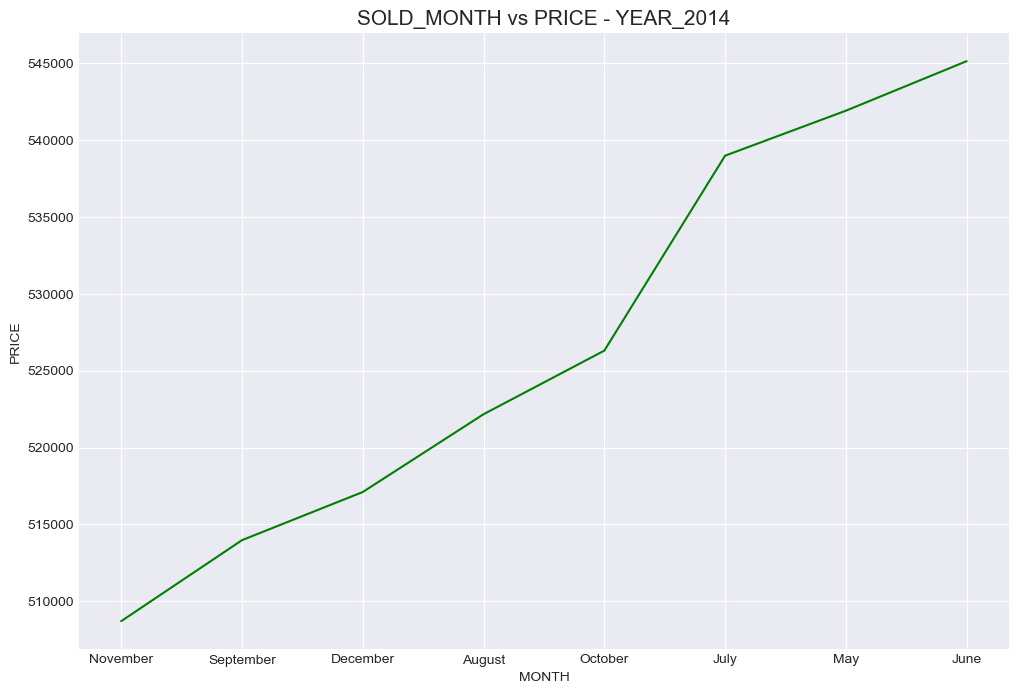

In [88]:
monthly_data_2014.plot(kind='line',color='green')
plt.title('SOLD_MONTH vs PRICE - YEAR_2014')
plt.xlabel('MONTH')
plt.ylabel('PRICE')

### 1. Average House price selling price is highest in the month of June
### 2. Average House price selling price is lowest in the month of November
### 3. Plots are arranged in the order of increase in price with respect to month

Text(0, 0.5, 'PRICE')

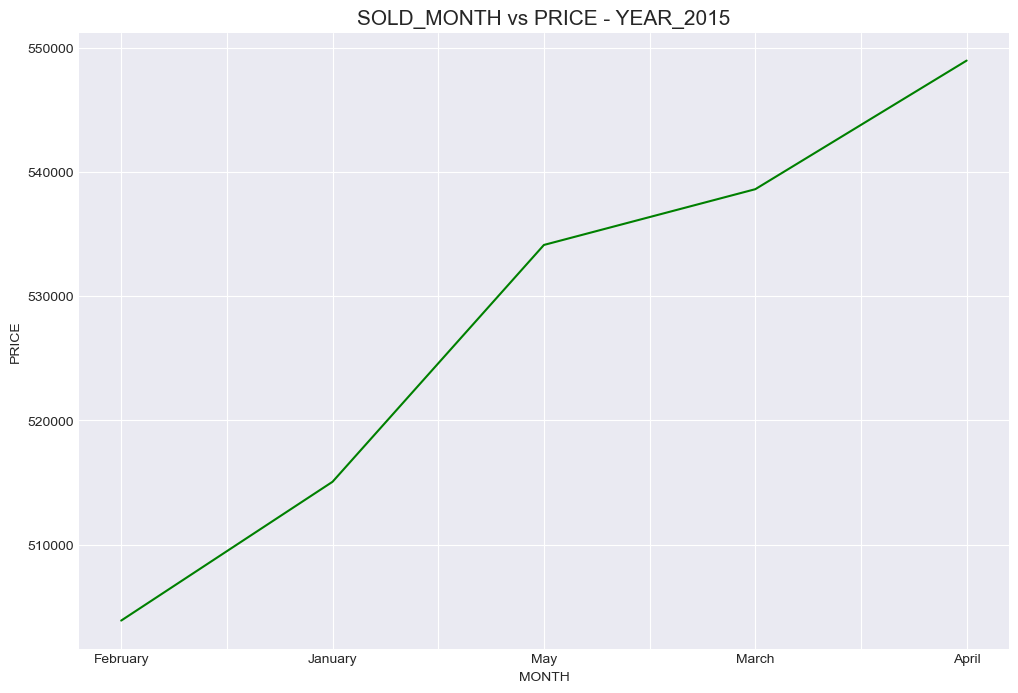

In [89]:
monthly_data_2015.plot(kind='line',color='green')
plt.title('SOLD_MONTH vs PRICE - YEAR_2015')
plt.xlabel('MONTH')
plt.ylabel('PRICE')

### 1. Average House price selling price is highest in the month of April
### 2. Average House price selling price is lowest in the month of Feb
### 3. Plots are arranged in the order of increase in price with respect to month

In [90]:
data.drop(['Sold_date','yr_built','yr_renovated','zipcode'],axis=1,inplace=True)

In [91]:
data.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'is_renovated', 'years_old',
       'location'],
      dtype='object')

In [92]:
data['location'].unique()

array(['Kirkland', 'Seattle', 'Auburn', 'Bellevue', 'Covington', 'Kent',
       'Snoqualmie', 'Renton', 'Redmond Ridge', 'Maple Valley',
       'Federal Way', 'Sammamish', 'Bothell', 'Carnation', 'Des Moines',
       'Redmond', 'Woodinville', 'Tanner', 'Burien', 'Shoreline',
       'Issaquah', 'Mercer Island', 'Kenmore', 'Duvall', 'Black Diamond',
       'SeaTac', 'Medina', 'Vashon', 'Enumclaw'], dtype=object)

In [93]:
data = data[data['room_bed'] <= 31]

In [94]:
data['is_renovated'] = data['is_renovated'].astype('object')

In [95]:
data.dtypes

price                 int64
room_bed            float64
room_bath           float64
ceil                float64
coast                object
sight                object
condition            object
quality              object
ceil_measure        float64
basement            float64
living_measure15    float64
lot_measure15       float64
furnished            object
total_area          float64
is_renovated         object
years_old             int64
location             object
dtype: object

In [96]:
data.shape

(20932, 17)

In [97]:

import scipy.stats as stats

# Select only the numeric columns
numeric_columns = ['room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area', 'years_old']

from scipy.stats import spearmanr

# Calculate the Spearman correlation coefficient and p-value for each numeric column
for column in numeric_columns:
    coefficient, p_value = spearmanr(data[column], data['price'])
    print(f"{column}:")
    print("Spearman Correlation:", coefficient)
    print("p-value:", p_value)
    print()


room_bed:
Spearman Correlation: 0.34013041471503613
p-value: 0.0

room_bath:
Spearman Correlation: 0.4902645143275087
p-value: 0.0

ceil:
Spearman Correlation: 0.2881489209969209
p-value: 0.0

ceil_measure:
Spearman Correlation: 0.5338024888177306
p-value: 0.0

basement:
Spearman Correlation: 0.24879362153861262
p-value: 8.729819469321781e-293

living_measure15:
Spearman Correlation: 0.5675338989232005
p-value: 0.0

lot_measure15:
Spearman Correlation: 0.04947527126187715
p-value: 7.951480034408389e-13

total_area:
Spearman Correlation: 0.16674150843233423
p-value: 2.3364036245688697e-130

years_old:
Spearman Correlation: -0.09606382308742709
p-value: 4.174788366043686e-44



# UNIVARIATE ANALYSIS

In [98]:
num = data.select_dtypes(['int64','float64'])

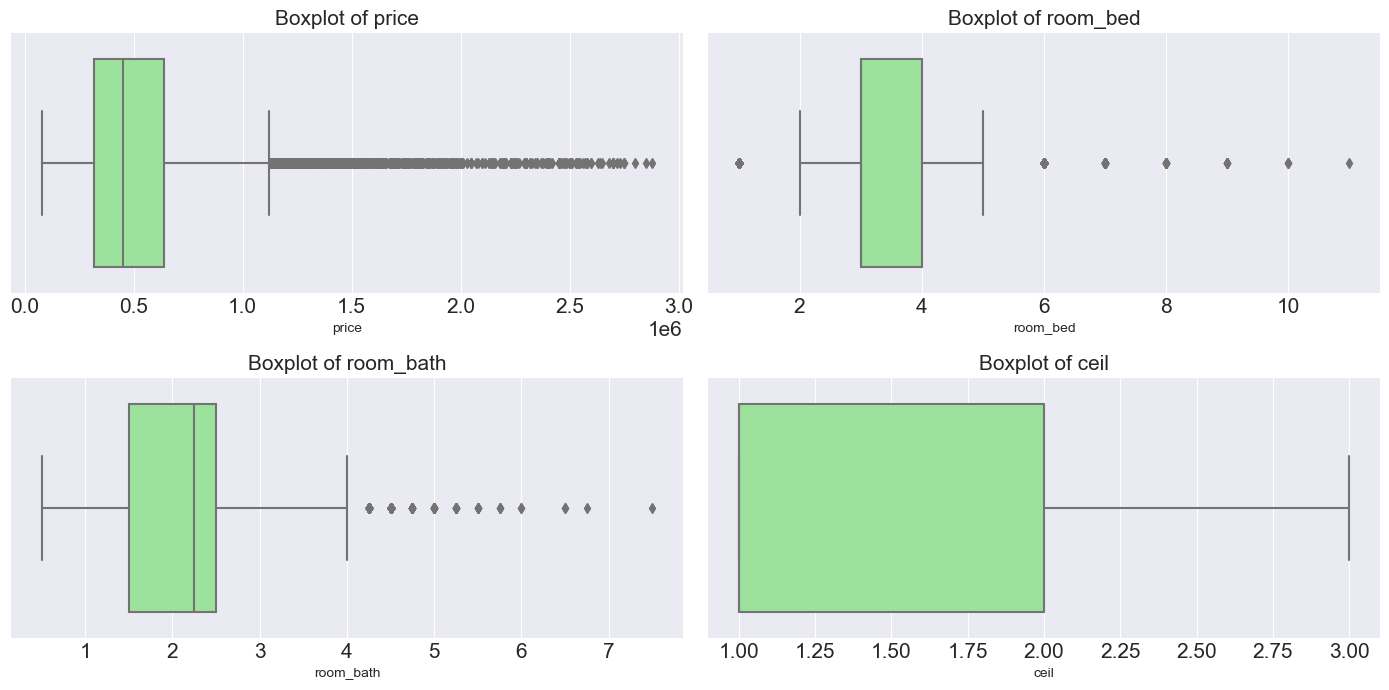

In [99]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['price', 'room_bed', 'room_bath', 'ceil']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[feature_list_1[i]], data=data,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()

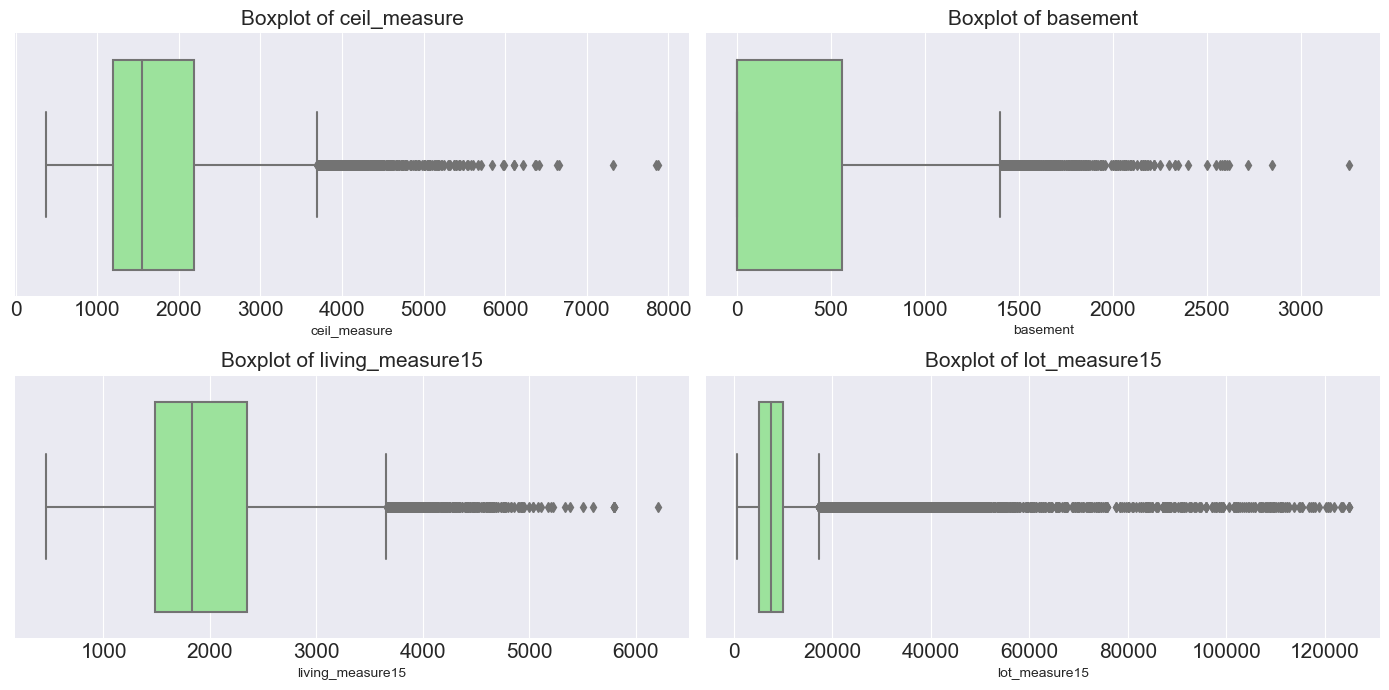

In [100]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_2 = ['ceil_measure', 'basement', 'living_measure15', 'lot_measure15']
for i in range(len(feature_list_2)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[feature_list_2[i]], data=data,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_2[i]))
    plt.tight_layout()
plt.show()

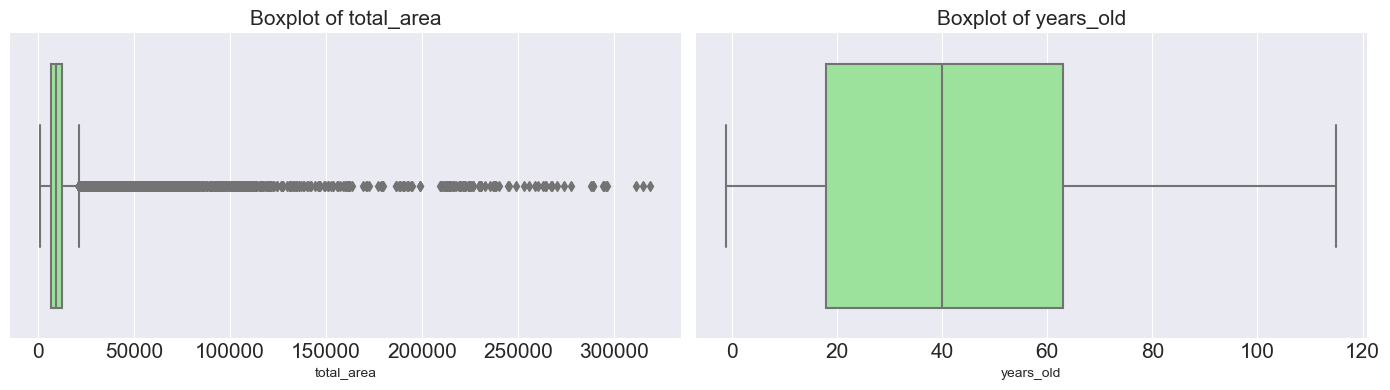

In [101]:
plt.figure(figsize = (14,4))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_3 = ['total_area','years_old']
for i in range(len(feature_list_3)):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=data[feature_list_3[i]], data=data,color='lightgreen')
    plt.title('Boxplot of {}'.format(feature_list_3[i]))
    plt.tight_layout()
plt.show()

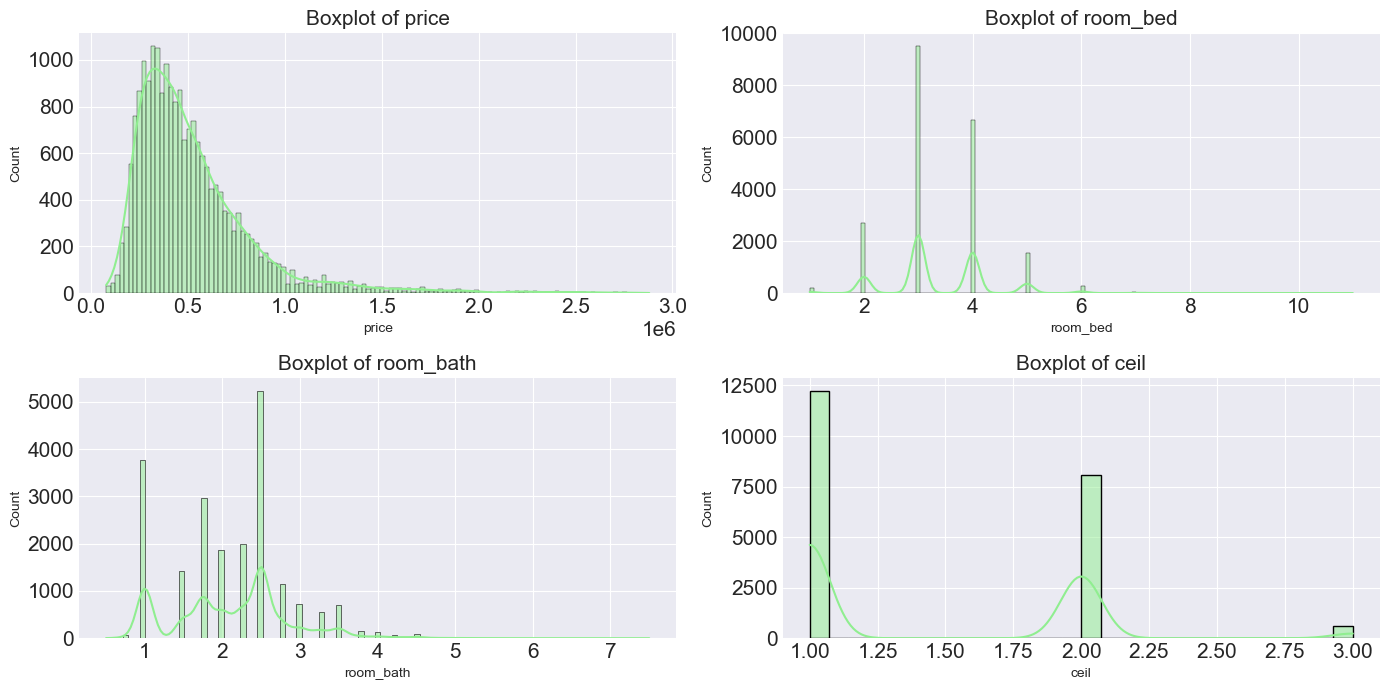

In [102]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_1 = ['price', 'room_bed', 'room_bath', 'ceil']
for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=data[feature_list_1[i]], data=data,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()
plt.show()

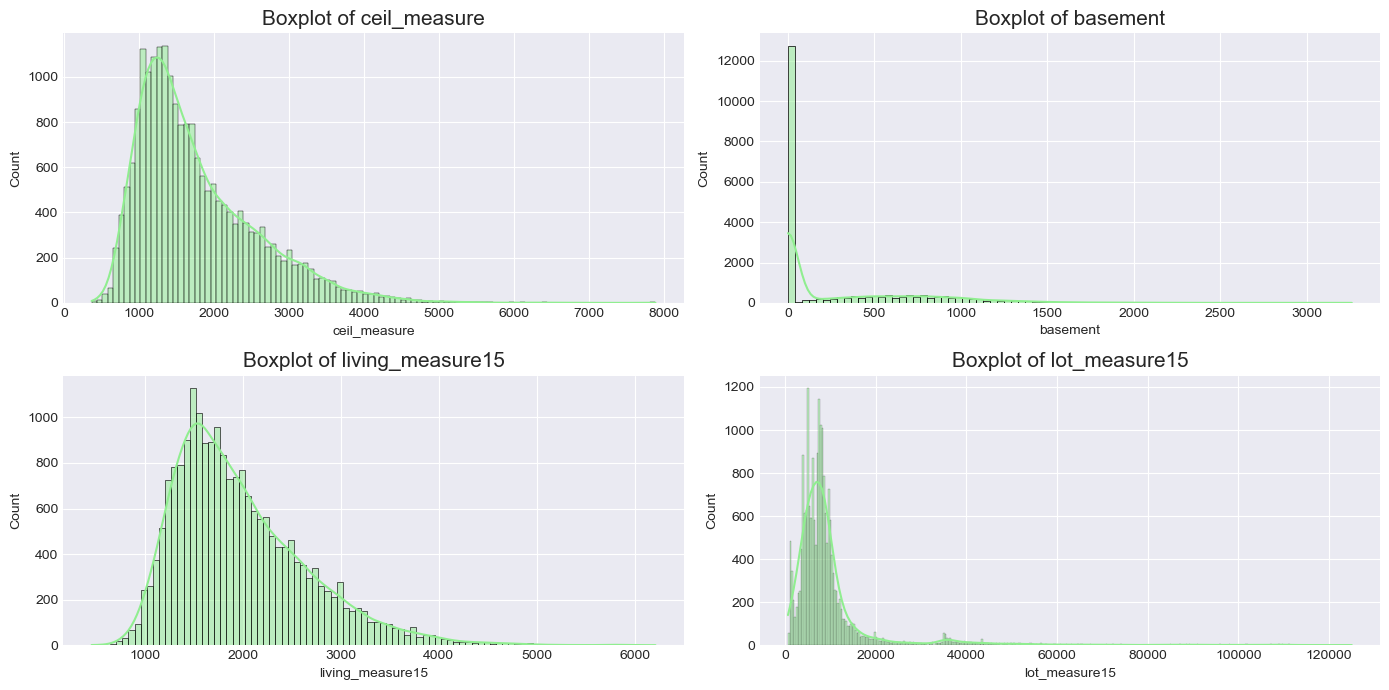

In [103]:
plt.figure(figsize = (14,7))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
feature_list_2 = ['ceil_measure', 'basement', 'living_measure15', 'lot_measure15']
for i in range(len(feature_list_2)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(x=data[feature_list_2[i]], data=data,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_2[i]))
    plt.tight_layout()
plt.show()

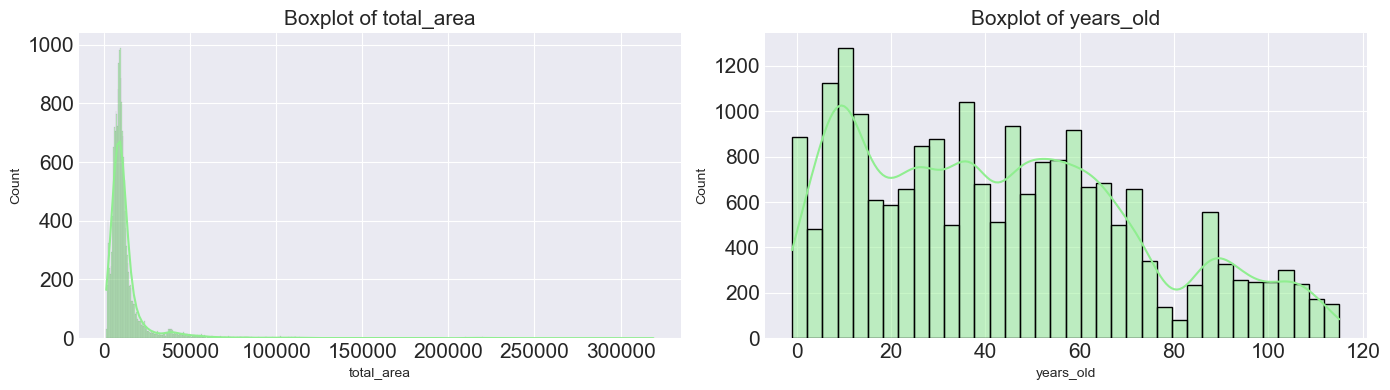

In [104]:
plt.figure(figsize = (14,4))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
feature_list_3 = ['total_area','years_old']
for i in range(len(feature_list_3)):
    plt.subplot(1, 2, i + 1)
    sns.histplot(x=data[feature_list_3[i]], data=data,color='lightgreen',kde=True)
    plt.title('Boxplot of {}'.format(feature_list_3[i]))
    plt.tight_layout()
plt.show()

In [105]:
obj = data.select_dtypes('object')

In [106]:
obj.columns

Index(['coast', 'sight', 'condition', 'quality', 'furnished', 'is_renovated',
       'location'],
      dtype='object')

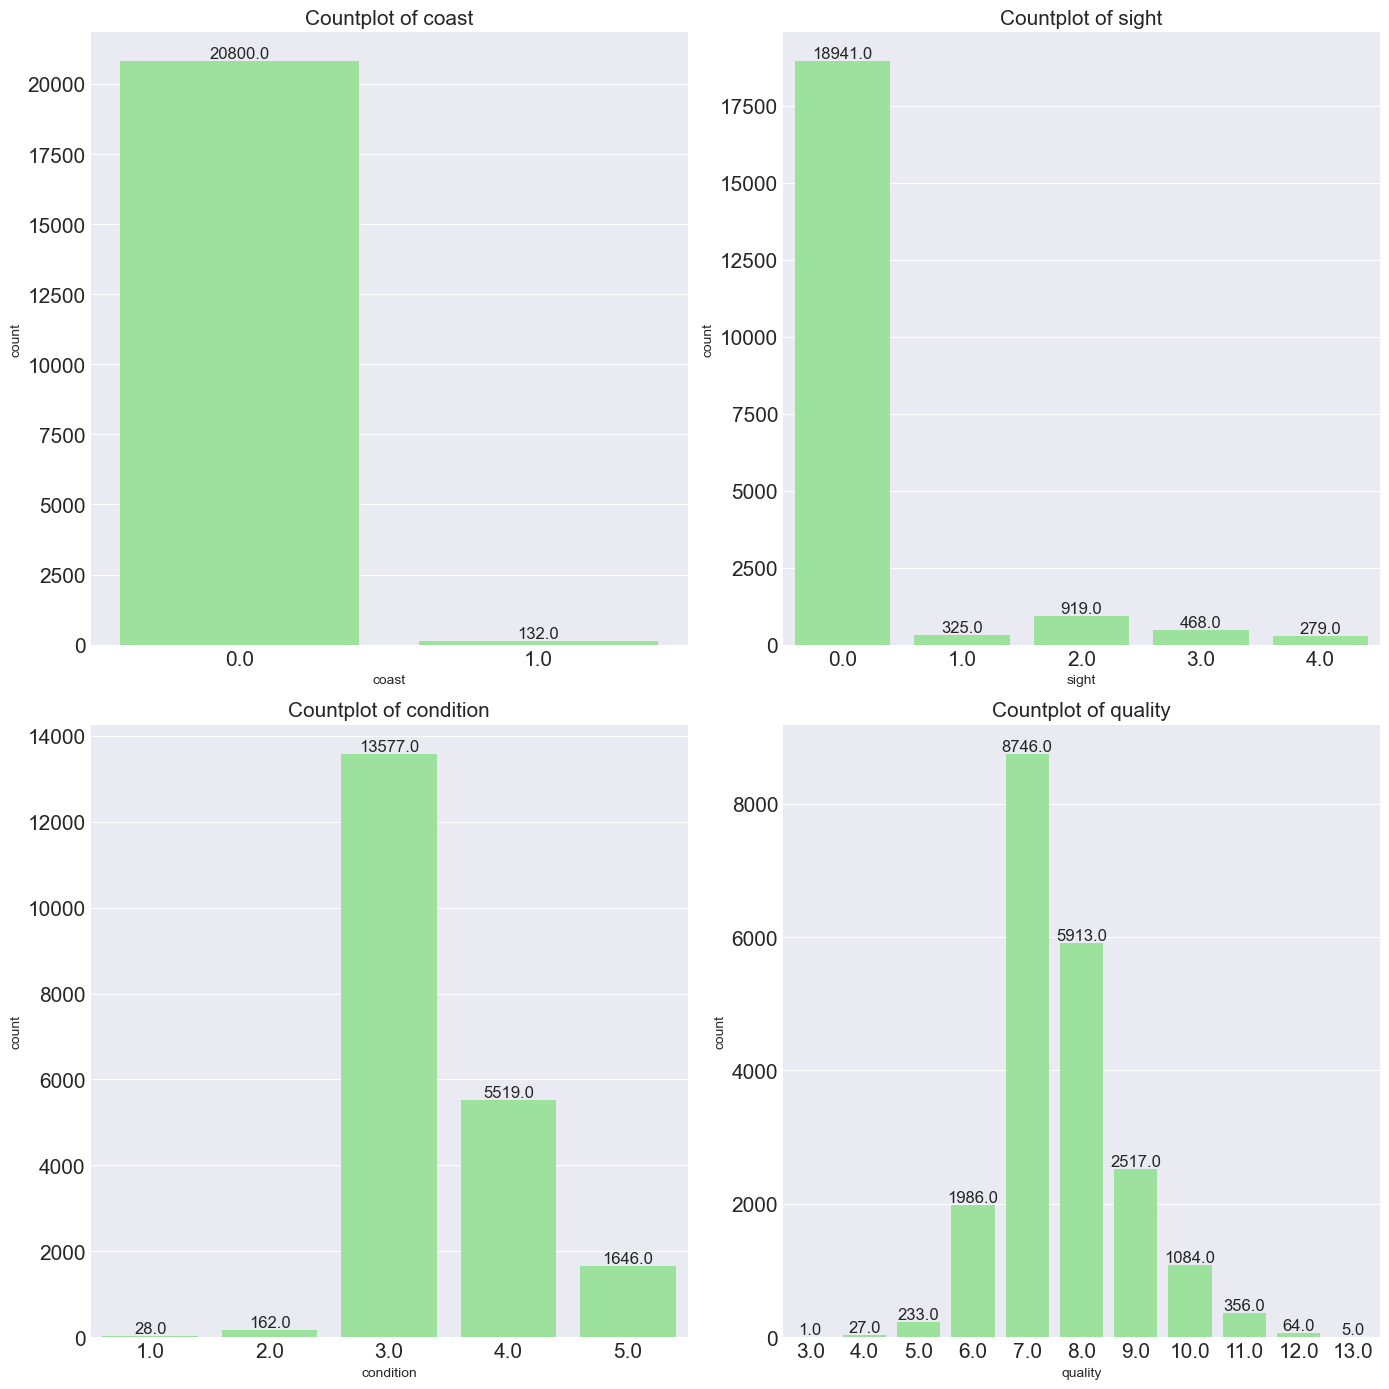

In [107]:
plt.figure(figsize=(14, 14))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

feature_list_1 = ['coast', 'sight', 'condition', 'quality']

for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[feature_list_1[i]], data=data, color='lightgreen')

    # Add labels on top of the bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=12)

    plt.title('Countplot of {}'.format(feature_list_1[i]))
    plt.tight_layout()

plt.show()


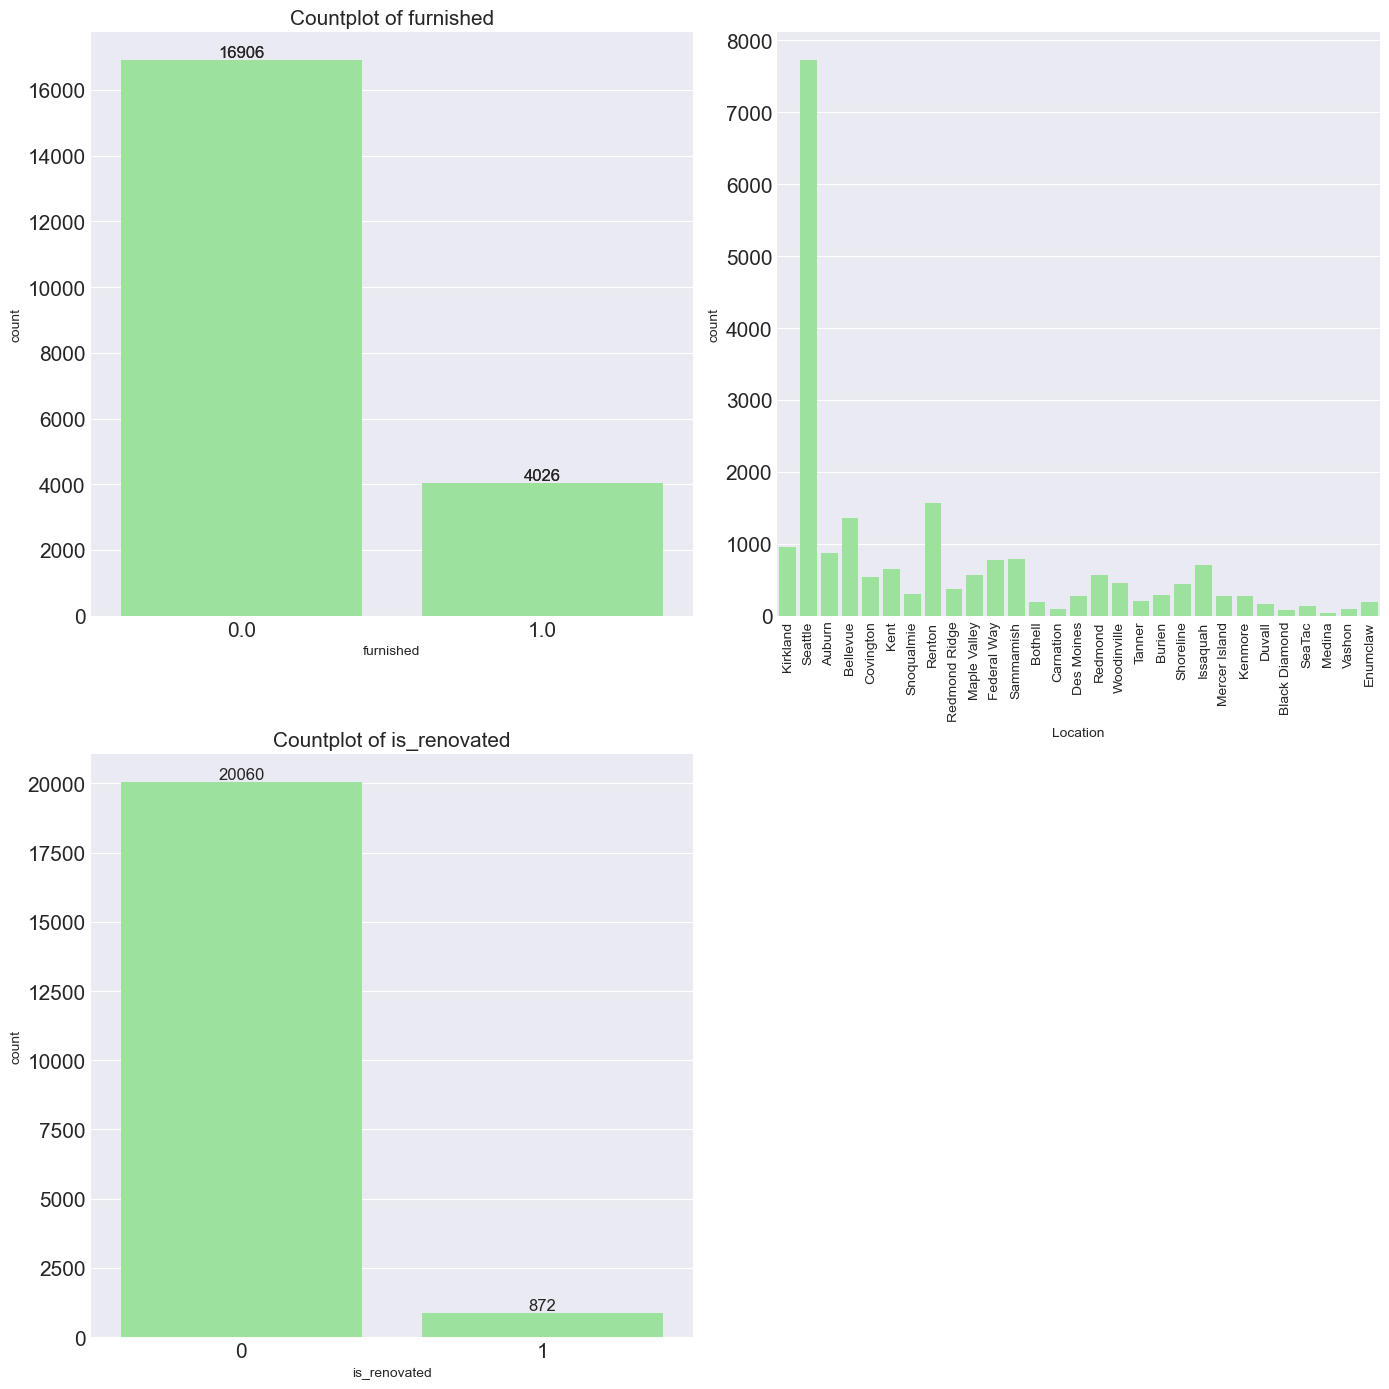

In [108]:
plt.figure(figsize=(14, 14))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

feature_list_1 = ['furnished', 'location', 'is_renovated']

for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    if feature_list_1[i] == 'location':
        sns.countplot(x=data[feature_list_1[i]], data=data, color='lightgreen')
        plt.xticks(rotation=90, fontsize=10)
        plt.xlabel('Location', fontsize=10)
    else:
        ax = sns.countplot(x=data[feature_list_1[i]], data=data, color='lightgreen')
        plt.title('Countplot of {}'.format(feature_list_1[i]))
        # Add labels on top of the bars
    for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom', fontsize=12)
    plt.tight_layout()

plt.show()


### Inference:

## Bi-Variate analysis

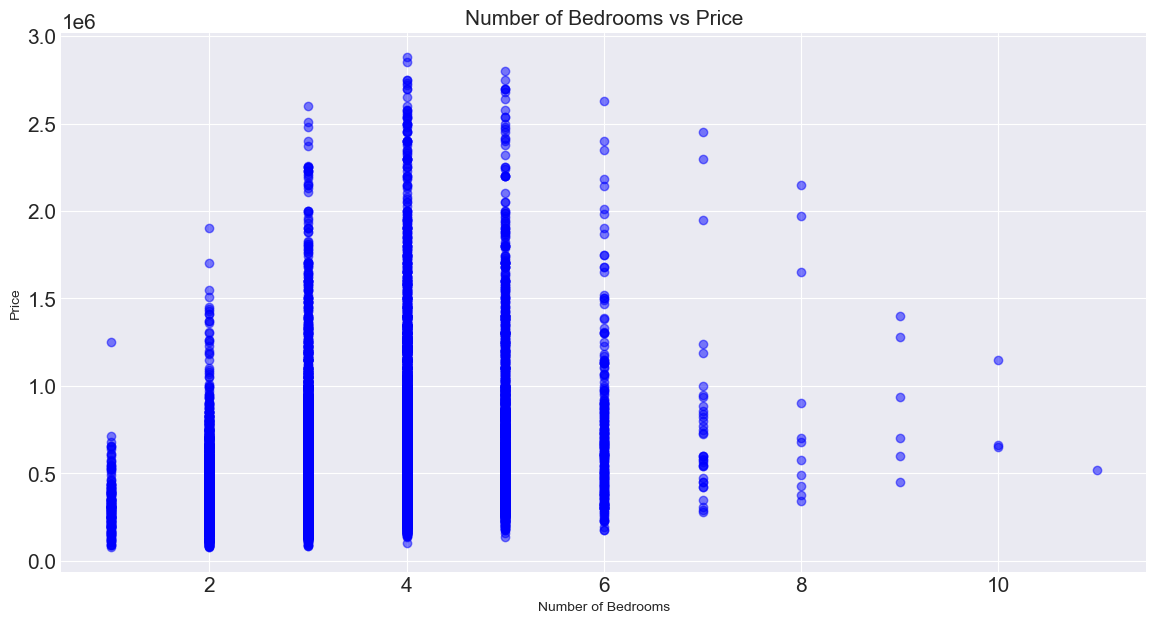

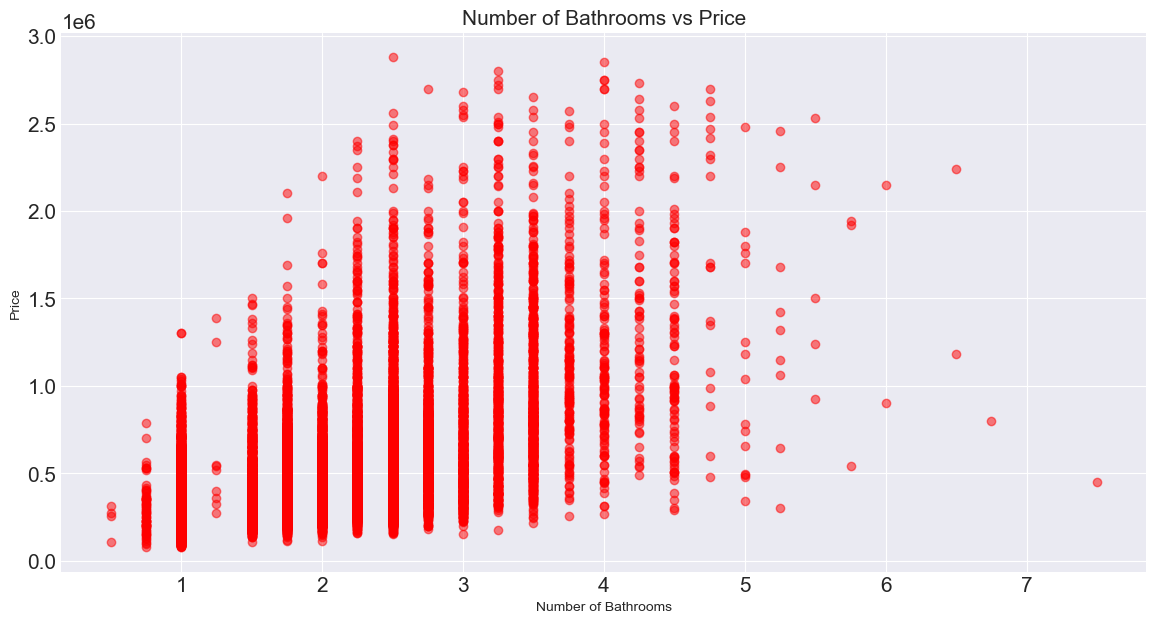

In [109]:
plt.figure(figsize=(14, 7))
plt.scatter(data['room_bed'], data['price'], color='b', alpha=0.5)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Number of Bedrooms vs Price')

plt.figure(figsize=(14, 7))
plt.scatter(data['room_bath'], data['price'], color='r', alpha=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Number of Bathrooms vs Price')

plt.show()

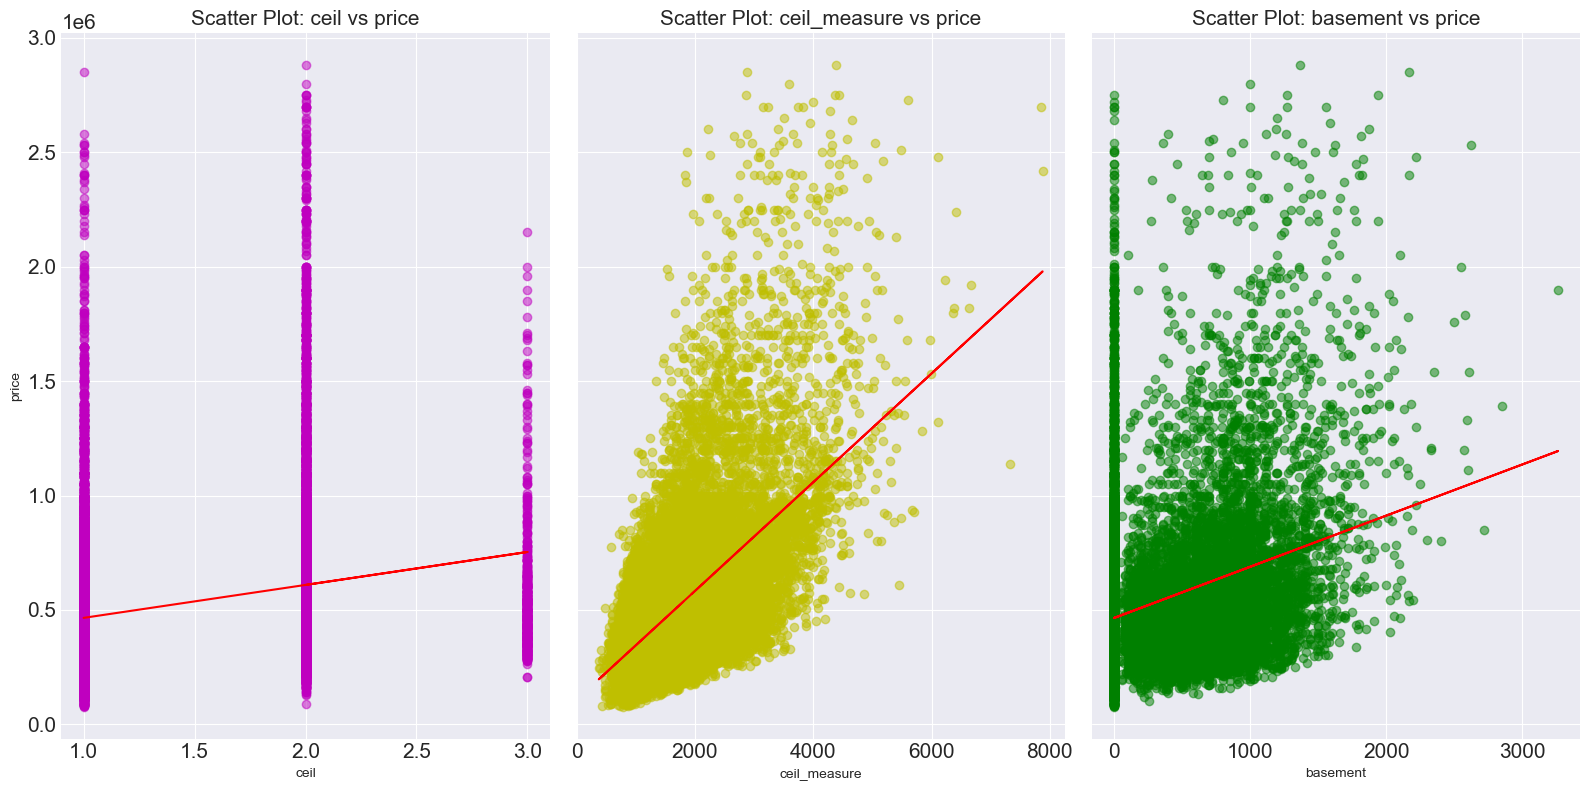

In [110]:


fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

# Scatter plot for 'ceil' vs 'price' with trend line
axs[0].scatter(data['ceil'], data['price'], color='m', alpha=0.5)
axs[0].set_xlabel('ceil')
axs[0].set_ylabel('price')
axs[0].set_title('Scatter Plot: ceil vs price')

# Fit a linear regression line to 'ceil' vs 'price'
ceil_coef = np.polyfit(data['ceil'], data['price'], 1)
ceil_line = np.poly1d(ceil_coef)
axs[0].plot(data['ceil'], ceil_line(data['ceil']), color='red')

# Scatter plot for 'ceil_measure' vs 'price' with trend line
axs[1].scatter(data['ceil_measure'], data['price'], color='y', alpha=0.5)
axs[1].set_xlabel('ceil_measure')
axs[1].set_title('Scatter Plot: ceil_measure vs price')

# Fit a linear regression line to 'ceil_measure' vs 'price'
ceil_measure_coef = np.polyfit(data['ceil_measure'], data['price'], 1)
ceil_measure_line = np.poly1d(ceil_measure_coef)
axs[1].plot(data['ceil_measure'], ceil_measure_line(data['ceil_measure']), color='red')

# Scatter plot for 'basement' vs 'price' with trend line
axs[2].scatter(data['basement'], data['price'], color='g', alpha=0.5)
axs[2].set_xlabel('basement')
axs[2].set_title('Scatter Plot: basement vs price')

# Fit a linear regression line to 'basement' vs 'price'
basement_coef = np.polyfit(data['basement'], data['price'], 1)
basement_line = np.poly1d(basement_coef)
axs[2].plot(data['basement'], basement_line(data['basement']), color='red')

plt.tight_layout()
plt.show()


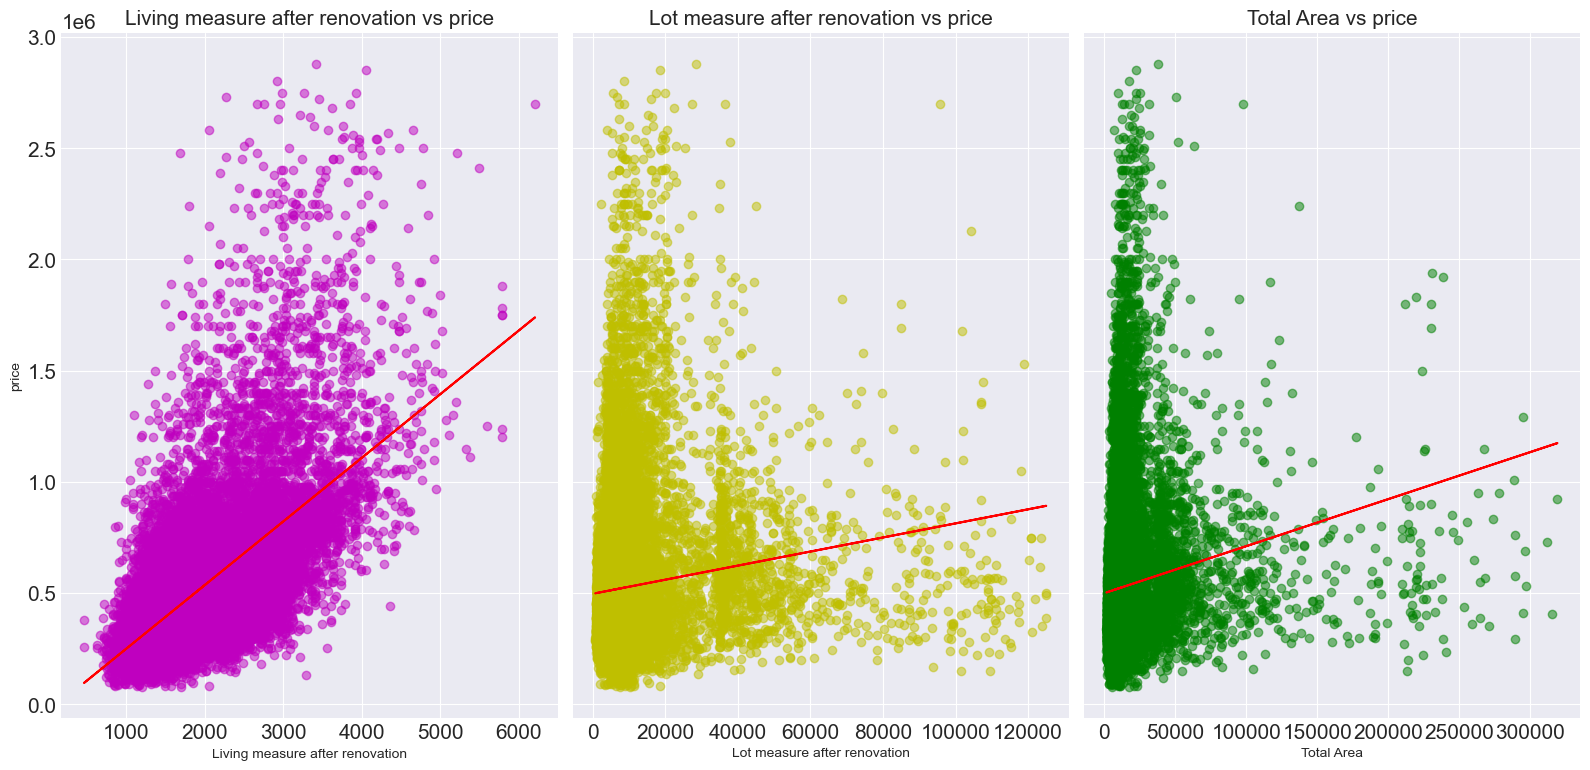

In [111]:


fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

# Scatter plot for 'living_measure15' vs 'price' with trend line
axs[0].scatter(data['living_measure15'], data['price'], color='m', alpha=0.5)
axs[0].set_xlabel('Living measure after renovation')
axs[0].set_ylabel('price')
axs[0].set_title('Living measure after renovation vs price')

# Fit a linear regression line to 'living_measure15' vs 'price'
living_measure15_coef = np.polyfit(data['living_measure15'], data['price'], 1)
living_measure15_line = np.poly1d(living_measure15_coef)
axs[0].plot(data['living_measure15'], living_measure15_line(data['living_measure15']), color='red')

# Scatter plot for 'lot_measure15' vs 'price' with trend line
axs[1].scatter(data['lot_measure15'], data['price'], color='y', alpha=0.5)
axs[1].set_xlabel('Lot measure after renovation')
axs[1].set_title('Lot measure after renovation vs price')

# Fit a linear regression line to 'lot_measure15' vs 'price'
lot_measure15_coef = np.polyfit(data['lot_measure15'], data['price'], 1)
lot_measure15_line = np.poly1d(lot_measure15_coef)
axs[1].plot(data['lot_measure15'], lot_measure15_line(data['lot_measure15']), color='red')

# Scatter plot for 'total_area' vs 'price' with trend line
axs[2].scatter(data['total_area'], data['price'], color='g', alpha=0.5)
axs[2].set_xlabel('Total Area')
axs[2].set_title('Total Area vs price')

# Fit a linear regression line to 'total_area' vs 'price'
total_area_coef = np.polyfit(data['total_area'], data['price'], 1)
total_area_line = np.poly1d(total_area_coef)
axs[2].plot(data['total_area'], total_area_line(data['total_area']), color='red')

plt.tight_layout()
plt.show()


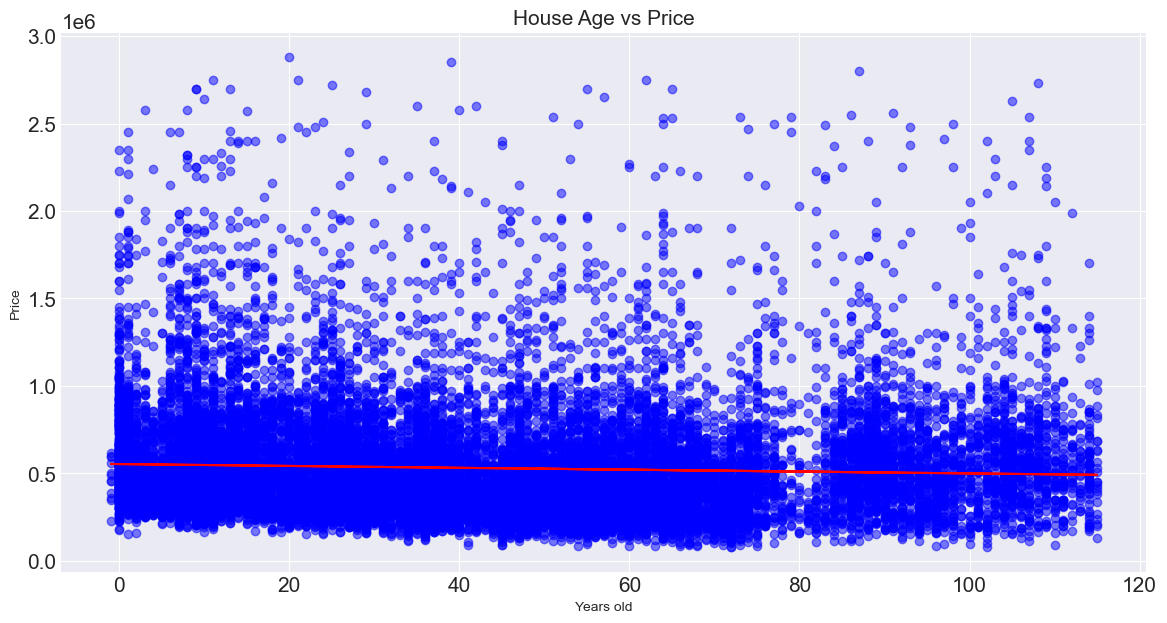

In [112]:

plt.figure(figsize=(14, 7))
plt.scatter(data['years_old'], data['price'], color='b', alpha=0.5)
plt.xlabel('Years old')
plt.ylabel('Price')
plt.title('House Age vs Price')

# Calculate coefficients and create a trendline
coefficients = np.polyfit(data['years_old'], data['price'], 1)
trendline = np.poly1d(coefficients)
plt.plot(data['years_old'], trendline(data['years_old']), color='r')

plt.show()


In [113]:
categorical_cols = ['coast', 'sight', 'condition', 'quality']



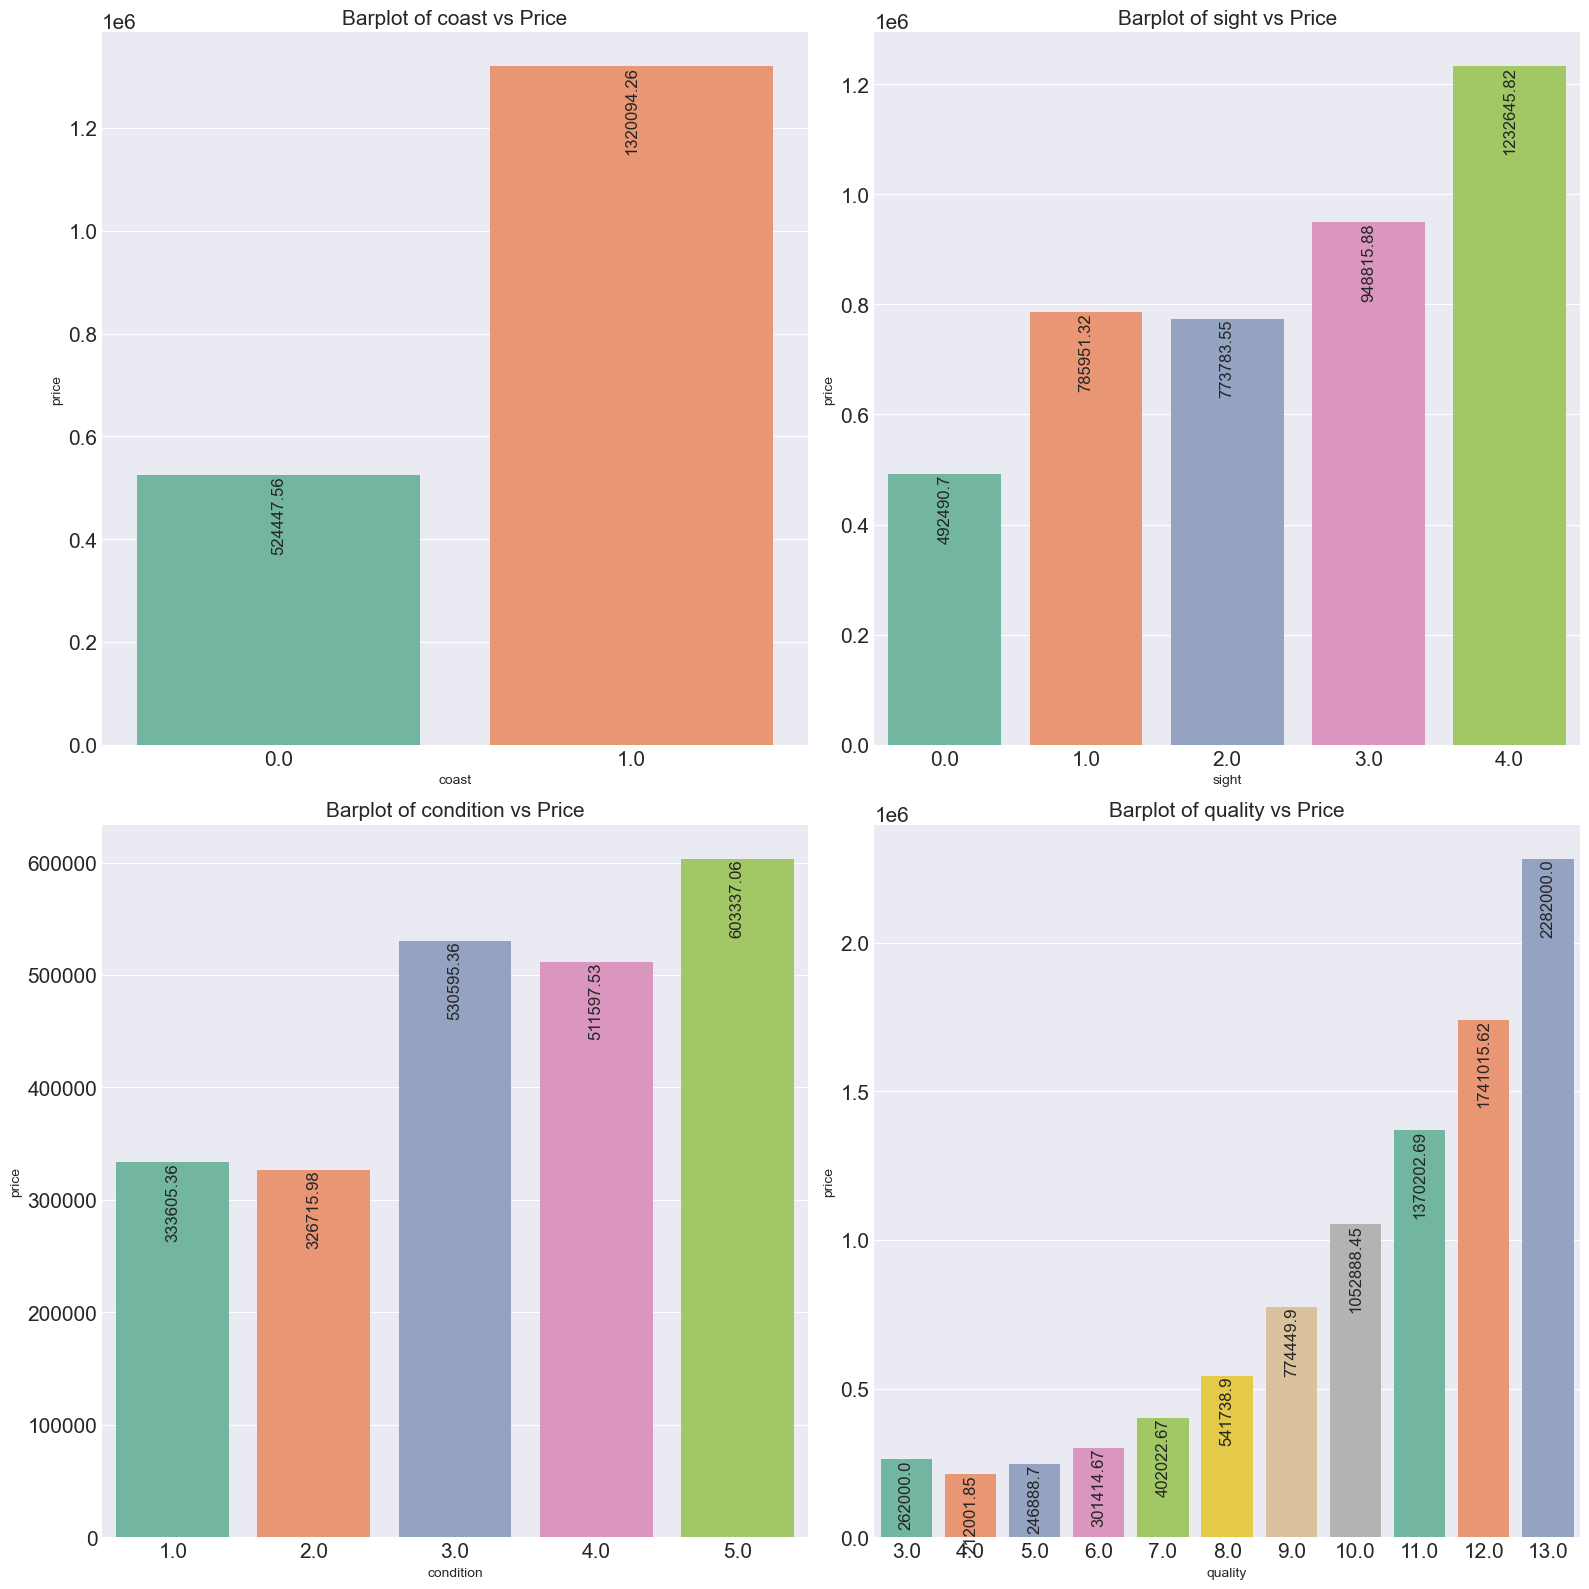

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 16))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

feature_list_1 = ['coast', 'sight', 'condition', 'quality']

for i in range(len(feature_list_1)):
    plt.subplot(2, 2, i + 1)
    ax = sns.barplot(x=feature_list_1[i], y='price', data=data, palette='Set2', ci=None)
    plt.title('Barplot of {} vs Price'.format(feature_list_1[i]))
    
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height - 0.05, round(height, 2), ha='center', va='top', rotation=90,fontsize=12)
    
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


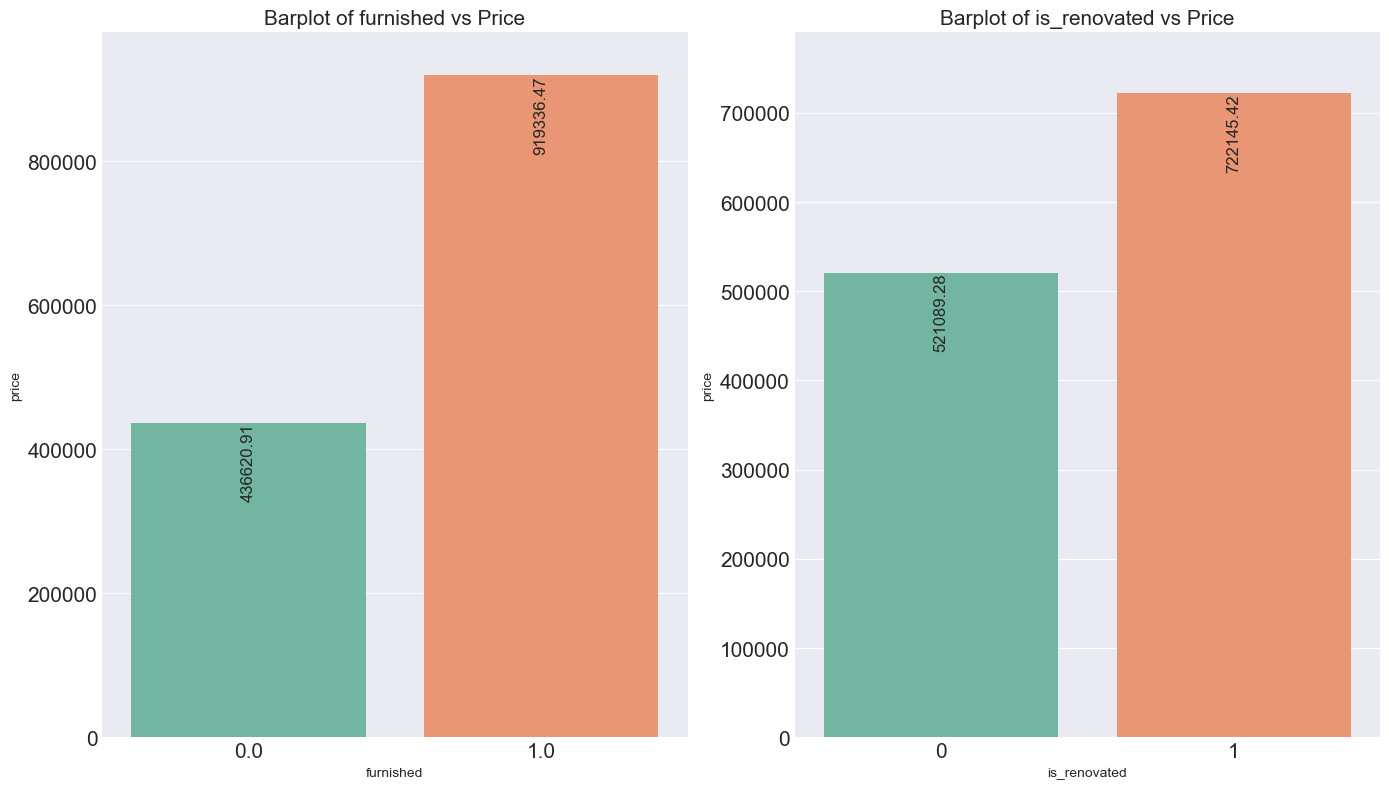

In [115]:

plt.figure(figsize=(14, 8))
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

feature_list_2 = ['furnished', 'is_renovated']

for i in range(len(feature_list_2)):
    plt.subplot(1, 2, i + 1)
    ax = sns.barplot(x=feature_list_2[i], y='price', data=data, palette='Set2', errwidth=0)
    plt.title('Barplot of {} vs Price'.format(feature_list_2[i]))
    
    # Add values inside the bars and rotate them 90 degrees
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height - 0.05, round(height, 2), ha='center', va='top', rotation=90,fontsize=12)
    
    plt.tight_layout()

plt.show()



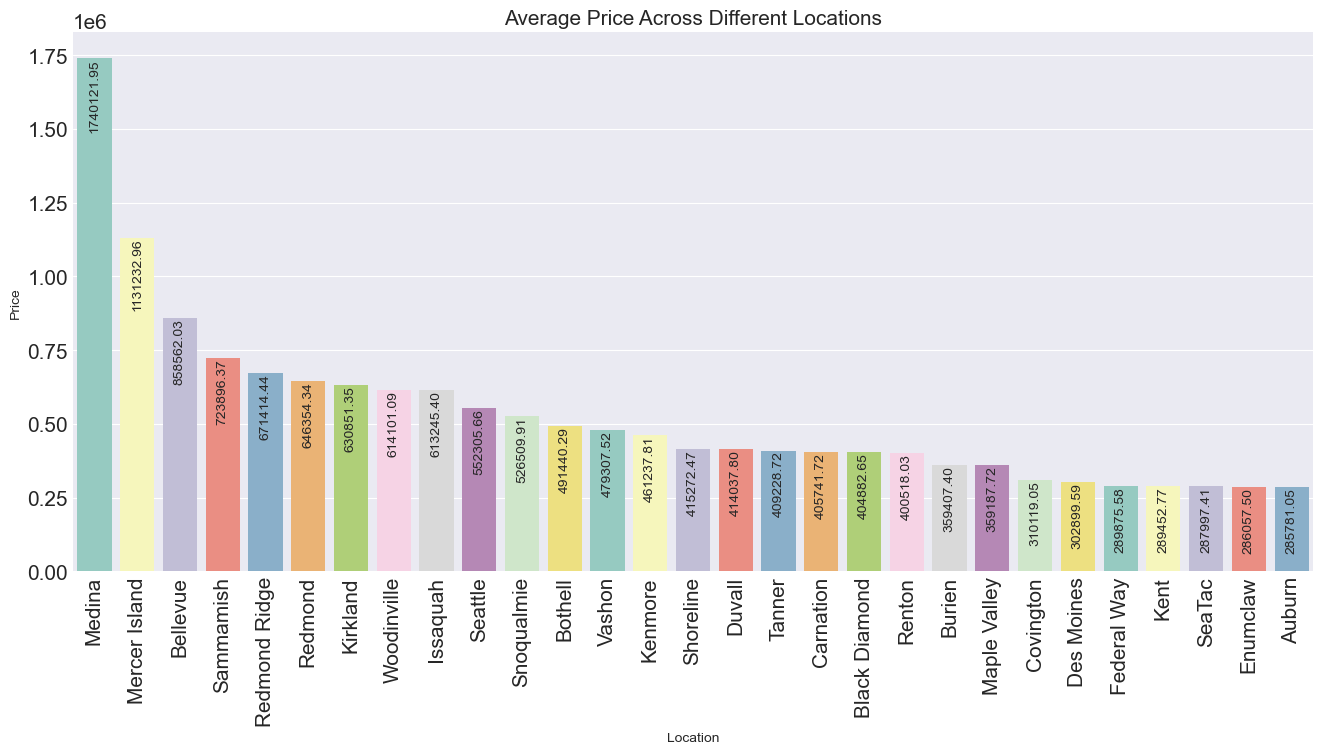

In [116]:

plt.rcParams['figure.figsize'] = (16, 7)

# Calculate the sum of prices by location
sum_prices = data.groupby('location')['price'].mean().reset_index()
sum_prices = sum_prices.sort_values(by='price', ascending=False)

# Create the bar plot
ax = sns.barplot(x='location', y='price', data=sum_prices, palette='Set3')

plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Average Price Across Different Locations')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='top', xytext=(0, 0), textcoords='offset points', rotation=90)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap of Features')

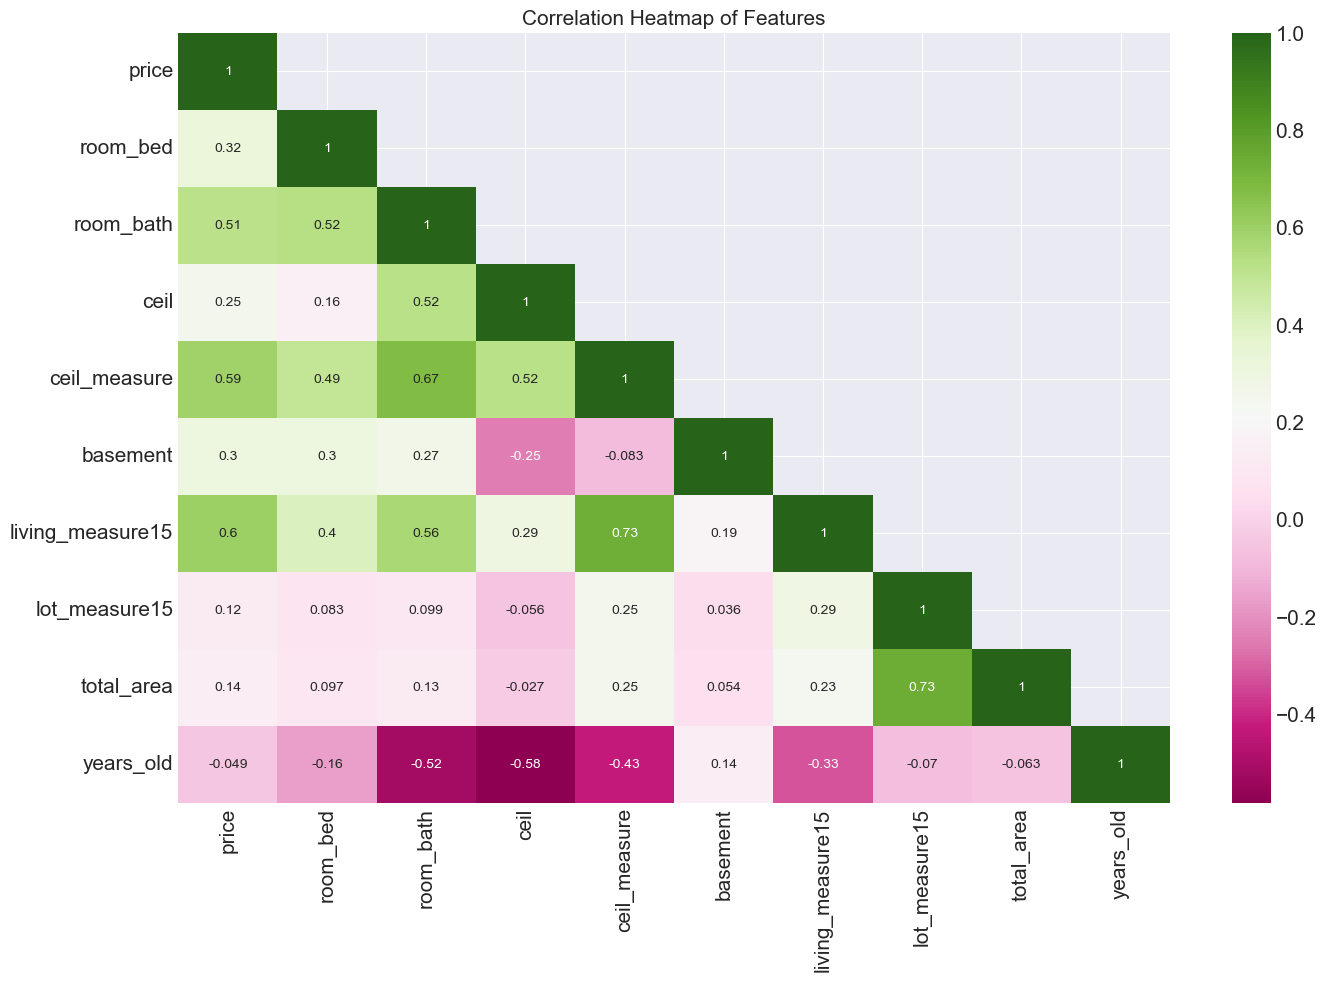

In [117]:
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap(data=data.corr(),annot=True,mask=np.triu(data.corr(),1),cmap="PiYG")
plt.title('Correlation Heatmap of Features')

In [118]:
data['quality'].value_counts()

7.0     8746
8.0     5913
9.0     2517
6.0     1986
10.0    1084
11.0     356
5.0      233
12.0      64
4.0       27
13.0       5
3.0        1
Name: quality, dtype: int64

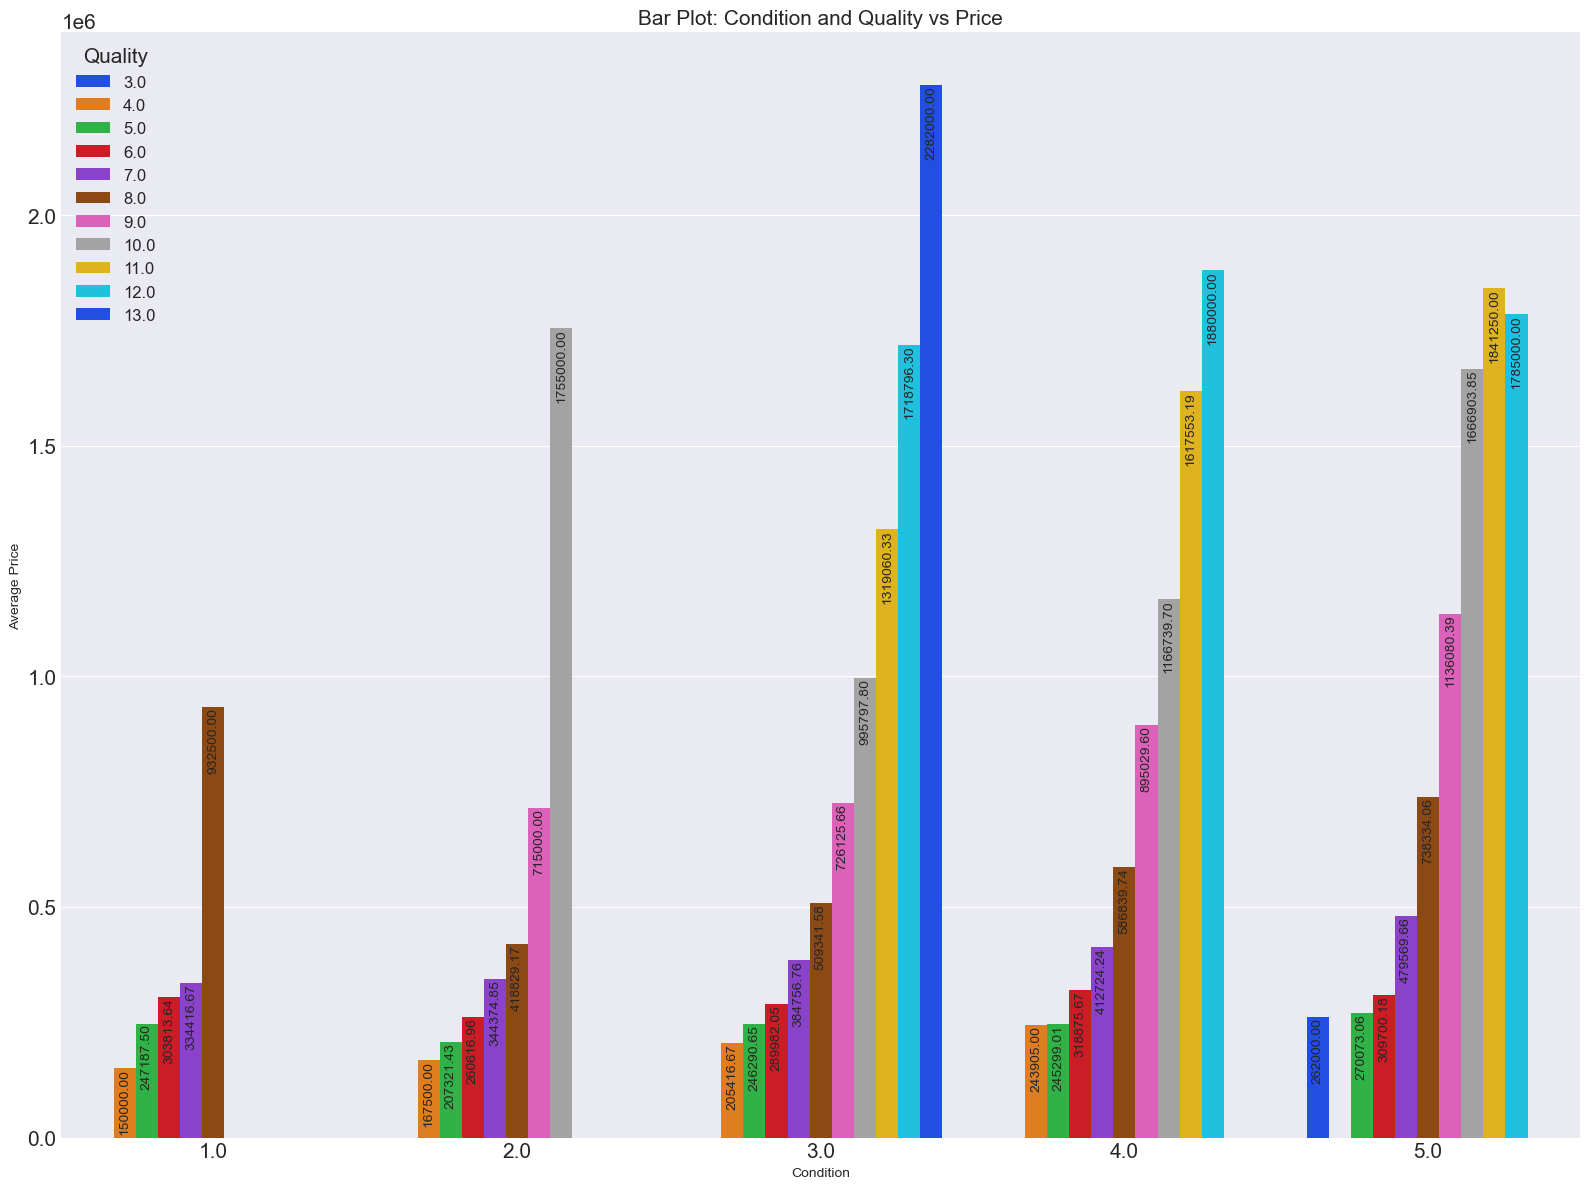

In [119]:
plt.figure(figsize=(16, 12))

# Grouped bar plot: condition and quality vs price
ax = sns.barplot(x='condition', y='price', hue='quality', data=data, palette='bright', errcolor='gray', errwidth=0, ci=None)

plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Bar Plot: Condition and Quality vs Price')
legend = ax.legend(title='Quality', loc='upper left', fontsize='large')
legend.get_title().set_fontsize('15')
legend.get_frame().set_facecolor('lightgray')

# Add labels with values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='top', xytext=(0, 0), textcoords='offset points', rotation=90)

plt.tight_layout()
plt.show()




## K-MEANS CLUSTERING 

In [120]:
from sklearn.cluster import KMeans

In [121]:
df = data.copy()

In [122]:
data = data.drop('location', axis=1).copy()

In [123]:
data_1 = data.copy()

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [125]:
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [126]:
wcss

[334911.99999999994,
 260308.30103657735,
 230080.06091610546,
 206706.9290519351,
 187333.84326232772,
 169555.07714424806,
 153156.48074914745,
 143514.0941333314,
 136441.84565765772,
 130881.64679147414,
 125796.45766647963,
 121221.43000842453]

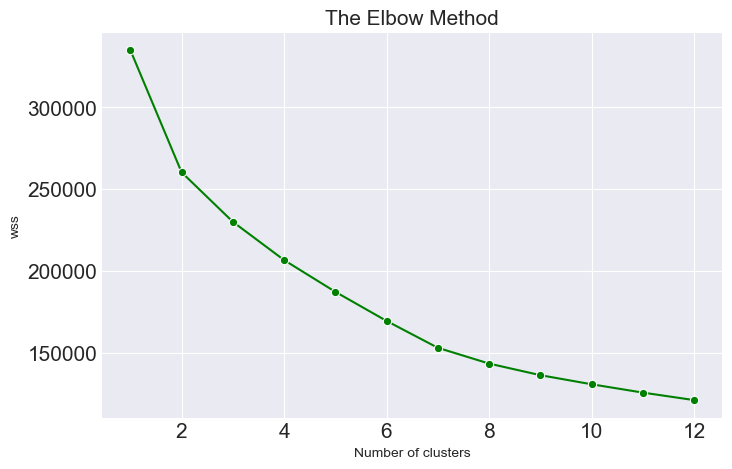

In [127]:
plt.figure(figsize=(8,5))
sns.lineplot(x = range(1,13),y=wcss,marker='o',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wss')
plt.show()

In [128]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=1)

In [129]:
data_1['cluster'] = kmeans.labels_

In [130]:
data_1

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,is_renovated,years_old,cluster
0,600000,4.0,1.75,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,2020.0,8660.0,0.0,12490.0,0,49,0
1,190000,2.0,1.00,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1660.0,4100.0,0.0,3771.0,0,67,0
2,735000,4.0,2.75,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,2620.0,2433.0,0.0,5455.0,0,48,3
3,257000,3.0,2.50,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2030.0,3794.0,0.0,5461.0,0,5,2
4,450000,2.0,1.00,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1120.0,5100.0,0.0,5710.0,0,91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,685530,4.0,2.50,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,2780.0,44224.0,1.0,63597.0,0,19,1
21609,535000,2.0,1.00,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1530.0,4944.0,0.0,5871.0,0,75,0
21610,998000,3.0,3.75,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,2390.0,34412.0,1.0,38122.0,0,36,1
21611,262000,4.0,2.50,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1160.0,7800.0,0.0,9360.0,0,18,2


In [131]:
data_1.dtypes

price                 int64
room_bed            float64
room_bath           float64
ceil                float64
coast                object
sight                object
condition            object
quality              object
ceil_measure        float64
basement            float64
living_measure15    float64
lot_measure15       float64
furnished            object
total_area          float64
is_renovated         object
years_old             int64
cluster               int32
dtype: object

In [132]:
cluster_means = {}

for cluster in range(5):
    if cluster in data_1['cluster'].unique():
        cluster_data = data_1[data_1['cluster'] == cluster]
        cluster_numeric_columns = cluster_data.select_dtypes(include=['int64','float64'])
        cluster_mean = cluster_numeric_columns.mean().round(2)
        cluster_means[cluster] = cluster_mean

# Convert cluster_means dictionary to a DataFrame
cluster_means_df = pd.DataFrame(cluster_means)

print("Mean values for each cluster:")
print(cluster_means_df)


Mean values for each cluster:
                          0          1          2           3
price             423252.29  920873.67  444362.66  1320094.26
room_bed               3.17       3.94       3.38        3.16
room_bath              1.67       2.86       2.47        2.43
ceil                   1.04       1.81       2.05        1.56
ceil_measure        1311.16    2878.79    1926.51     2188.98
basement             344.05     382.00      88.62      544.05
living_measure15    1681.27    2882.49    1919.27     2517.82
lot_measure15       9426.51   16914.46    6551.87    20663.19
total_area         12274.10   25301.19    8812.63    22741.59
years_old             61.20      26.83      16.94       54.17


In [133]:
cluster_modes = {}

for cluster in range(5):
    if cluster in data_1['cluster'].unique():
        cluster_data = data_1[data_1['cluster'] == cluster]
        cluster_obj_columns = cluster_data.select_dtypes(include='object')
        cluster_modes[cluster] = cluster_obj_columns.mode().iloc[0]

# Convert cluster_modes dictionary to a DataFrame
cluster_modes_df = pd.DataFrame(cluster_modes)

print("Most frequent values for each object column within each cluster:")
print(cluster_modes_df)


Most frequent values for each object column within each cluster:
                0    1    2    3
coast         0.0  0.0  0.0  1.0
sight         0.0  0.0  0.0  4.0
condition     3.0  3.0  3.0  3.0
quality       7.0  9.0  8.0  8.0
furnished     0.0  1.0  0.0  0.0
is_renovated    0    0    0    0


In [134]:
df['location'].nunique()

29

### For model building purpose we will reduce the values in location (below 500 threshold will be regarded as Other location)

In [135]:
df.shape

(20932, 17)

In [136]:
threshold = 500
location_counts = df['location'].value_counts()
locations_to_replace = location_counts[location_counts <= threshold].index
df['location'] = np.where(df['location'].isin(locations_to_replace), 'Others', df['location'])


In [137]:
df['location'].value_counts()

Seattle         7727
Others          3886
Renton          1569
Bellevue        1361
Kirkland         957
Auburn           870
Sammamish        783
Federal Way      769
Issaquah         706
Kent             644
Redmond          566
Maple Valley     559
Covington        535
Name: location, dtype: int64

In [138]:
df['location'].nunique()

13

In [139]:
num.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'years_old'],
      dtype='object')

In [140]:
obj.columns

Index(['coast', 'sight', 'condition', 'quality', 'furnished', 'is_renovated',
       'location'],
      dtype='object')

### Before encoding a copy is created for dataset 

In [141]:
df_c = df.copy()

## ENCODING 

In [142]:
df_c.dtypes


price                 int64
room_bed            float64
room_bath           float64
ceil                float64
coast                object
sight                object
condition            object
quality              object
ceil_measure        float64
basement            float64
living_measure15    float64
lot_measure15       float64
furnished            object
total_area          float64
is_renovated         object
years_old             int64
location             object
dtype: object

In [143]:
#First we will check categorical columns

In [144]:
df['quality'].unique()

array([8.0, 6.0, 7.0, 10.0, 9.0, 5.0, 11.0, 4.0, 12.0, 13.0, 3.0],
      dtype=object)

In [145]:
# Quality is encoded as 1 to11 (the real values are from 3 to 13)
quality_mapping = {
    3: 1,
    4: 2,
    5: 3,
    6: 4,
    7: 5,
    8: 6,
    9: 7,
    10: 8,
    11: 9,
    12: 10,
    13: 11
}

df_c['quality'] = df_c['quality'].map(quality_mapping)

In [146]:
df_c['quality'].value_counts()

5     8746
6     5913
7     2517
4     1986
8     1084
9      356
3      233
10      64
2       27
11       5
1        1
Name: quality, dtype: int64

### Condition column doesnot needs to be encoded 
1: Poor condition
2: Fair condition
3: Average condition
4: Good condition
5: Excellent condition

In [147]:
df_c['condition'] = df_c['condition'].astype('category')
df_c['quality'] = df_c['quality'].astype('category')

###  Sight column enconding
0: No view
1: Minimal view
2: Moderate view
3: Well view
4: Excellent view
This encoding preserves the ordinal nature of the variable, allowing the model to understand and capture the relationship between different levels of viewing.

In [148]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

df_c['sight'] = label_encoder.fit_transform(df_c['sight'])


### One_hot encoding can be used for columns such as 'location','furnished','is_renovated','coast'

In [149]:

columns_to_encode = ['coast', 'furnished', 'location', 'is_renovated','condition','quality']

df_encoded = pd.get_dummies(df_c[columns_to_encode], drop_first=True)

# Concatenate encoded columns with original dataframe
df_c = pd.concat([df_c.drop(columns_to_encode, axis=1), df_encoded], axis=1)


In [150]:
df_c.head()

,price,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
0,600000,4.0,1.75,1.0,0,1800.0,1250.0,2020.0,8660.0,12490.0,...,0,0,0,0,1,0,0,0,0,0
1,190000,2.0,1.00,1.0,0,670.0,0.0,1660.0,4100.0,3771.0,...,0,0,1,0,0,0,0,0,0,0
2,735000,4.0,2.75,2.0,4,3040.0,0.0,2620.0,2433.0,5455.0,...,0,0,0,0,1,0,0,0,0,0
3,257000,3.0,2.50,2.0,0,1740.0,0.0,2030.0,3794.0,5461.0,...,0,0,0,0,1,0,0,0,0,0
4,450000,2.0,1.00,1.0,0,1120.0,0.0,1120.0,5100.0,5710.0,...,0,0,0,1,0,0,0,0,0,0


## Scaling the data (Numeric columns)

In [151]:
num.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'years_old'],
      dtype='object')

In [152]:
num.skew()

price               2.383313
room_bed            0.542857
room_bath           0.384765
ceil                0.737323
ceil_measure        1.280522
basement            1.458538
living_measure15    1.086585
lot_measure15       4.754992
total_area          7.211557
years_old           0.459973
dtype: float64

In [153]:
# Checking the significance of correlation


In [154]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to scale
numerical_columns = ['price', 'room_bed', 'room_bath', 'ceil', 'ceil_measure', 'basement', 'living_measure15', 'lot_measure15', 'total_area', 'years_old']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected numerical columns
df_c[numerical_columns] = scaler.fit_transform(df_c[numerical_columns])


In [155]:
df_c

,price,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
0,0.219384,0.700943,-0.470981,-0.804904,0,0.035985,2.214238,0.064745,-0.127712,-0.070860,...,0,0,0,0,1,0,0,0,0,0
1,-1.055831,-1.519753,-1.466763,-0.804904,0,-1.376533,-0.664307,-0.467693,-0.503582,-0.489672,...,0,0,1,0,0,0,0,0,0,0
2,0.639271,0.700943,0.856728,1.005762,4,1.586005,-0.664307,0.952142,-0.640989,-0.408782,...,0,0,0,0,1,0,0,0,0,0
3,-0.847443,-0.409405,0.524801,1.005762,0,-0.039016,-0.664307,0.079535,-0.528805,-0.408494,...,0,0,0,0,1,0,0,0,0,0
4,-0.247158,-1.519753,-1.466763,-0.804904,0,-0.814026,-0.664307,-1.266350,-0.421154,-0.396534,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.485406,0.700943,0.524801,1.005762,0,1.698506,-0.664307,1.188781,2.803745,2.384034,...,0,0,0,0,0,1,0,0,0,0
21609,0.017215,-1.519753,-1.466763,-0.804904,0,-1.064029,-0.410995,-0.659962,-0.434013,-0.388800,...,0,0,0,1,0,0,0,0,0,0
21610,1.457275,-0.409405,2.184437,1.005762,0,1.423503,1.177962,0.611973,1.994965,1.160358,...,0,0,0,0,0,0,1,0,0,0
21611,-0.831891,0.700943,0.524801,1.005762,0,-0.264019,-0.664307,-1.207190,-0.198600,-0.221208,...,0,0,0,1,0,0,0,0,0,0


### Statistical infernce of correlation 

### 1. Checking  statistical significance of correlations

In [156]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_c[numerical_columns])
print('The p_value is ',p_value)
print('The chi-sqaure value is ',chi_square_value)

The p_value is  0.0
The chi-sqaure value is  107837.94387642604


In [157]:
# We will have remove more columns to address the issue of multicollinearity

### 2. Shapiro test for checking normality of target variable

In [158]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df_c['price'])
print("Shapiro-Wilk Test - p-value:", p_value)


Shapiro-Wilk Test - p-value: 0.0


In [159]:
#The p-value is <0.05 for the Shapiro-Wilk test, it means that the null hypothesis of normality is rejected. 

In [160]:
df_c.to_excel('House_price_data.xlsx', index=False)

### Train test split 

In [161]:
# independent variables
X = df_c.drop(['price'], axis=1)
# dependent variable
y = df_c['price']

In [162]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [163]:
X.columns

Index(['room_bed', 'room_bath', 'ceil', 'sight', 'ceil_measure', 'basement',
       'living_measure15', 'lot_measure15', 'total_area', 'years_old',
       'coast_1.0', 'furnished_1.0', 'location_Bellevue', 'location_Covington',
       'location_Federal Way', 'location_Issaquah', 'location_Kent',
       'location_Kirkland', 'location_Maple Valley', 'location_Others',
       'location_Redmond', 'location_Renton', 'location_Sammamish',
       'location_Seattle', 'is_renovated_1', 'condition_2.0', 'condition_3.0',
       'condition_4.0', 'condition_5.0', 'quality_2', 'quality_3', 'quality_4',
       'quality_5', 'quality_6', 'quality_7', 'quality_8', 'quality_9',
       'quality_10', 'quality_11'],
      dtype='object')

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [165]:
X_train

,room_bed,room_bath,ceil,sight,ceil_measure,basement,living_measure15,lot_measure15,total_area,years_old,...,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11
9539,-0.409405,0.524801,1.005762,0,-0.151517,-0.664307,-0.763492,-0.686983,-0.456721,-1.137774,...,0,0,0,1,0,0,0,0,0,0
12864,-1.519753,0.524801,1.005762,4,0.210987,1.569444,0.833823,1.103592,0.403191,-0.491919,...,0,0,0,0,0,1,0,0,0,0
17652,-0.409405,0.192874,-0.804904,0,-0.739025,0.394998,-0.068364,-0.212612,-0.225531,0.085950,...,0,0,0,0,1,0,0,0,0,0
12274,-0.409405,-1.466763,-0.804904,0,-0.351520,-0.664307,0.464074,-0.371698,-0.325443,1.853551,...,0,0,0,1,0,0,0,0,0,0
1368,-1.519753,-0.802908,-0.804904,0,0.360989,-0.664307,-0.290213,-0.205771,-0.201370,1.411651,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11297,-0.409405,-0.139054,-0.804904,0,-0.764025,1.454302,-0.955761,-0.521716,-0.384525,0.561843,...,0,0,0,1,0,0,0,0,0,0
17852,0.700943,3.180219,-0.804904,0,2.648519,2.859032,4.117191,7.560315,4.485684,-1.035797,...,0,0,0,0,0,0,0,1,0,0
5353,-1.519753,-1.466763,-0.804904,0,-0.901527,-0.664307,0.626763,-0.056412,-0.217750,0.425874,...,0,0,0,1,0,0,0,0,0,0
12559,0.700943,-0.470981,-0.804904,0,-0.001515,-0.664307,0.257015,0.219721,0.032654,-0.559904,...,0,0,0,0,1,0,0,0,0,0


In [166]:
X_test.dtypes

room_bed                 float64
room_bath                float64
ceil                     float64
sight                      int32
ceil_measure             float64
basement                 float64
living_measure15         float64
lot_measure15            float64
total_area               float64
years_old                float64
coast_1.0                  uint8
furnished_1.0              uint8
location_Bellevue          uint8
location_Covington         uint8
location_Federal Way       uint8
location_Issaquah          uint8
location_Kent              uint8
location_Kirkland          uint8
location_Maple Valley      uint8
location_Others            uint8
location_Redmond           uint8
location_Renton            uint8
location_Sammamish         uint8
location_Seattle           uint8
is_renovated_1             uint8
condition_2.0              uint8
condition_3.0              uint8
condition_4.0              uint8
condition_5.0              uint8
quality_2                  uint8
quality_3 

In [167]:
y_train

9539    -0.906538
12864    2.396580
17652   -0.878545
12274    0.152513
1368    -0.982740
           ...   
11297    0.530412
17852    2.178860
5353     0.312692
12559   -0.402673
247      0.188281
Name: price, Length: 14652, dtype: float64

In [168]:
y_test

12619    0.266038
13627    0.617500
10779   -0.667046
7862    -1.133588
84       0.633051
           ...   
13174   -1.087090
219     -0.202059
4027     0.648602
7839    -0.018677
4258    -0.962523
Name: price, Length: 6280, dtype: float64

# MODEL_BUILDING

### LINEAR_REG 

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [170]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [171]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.7307386603114516


In [172]:
n= len(X_train)
p = len(X.columns)
adj_R2_train = 1- ((1-regression_model.score(X_train, y_train)) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
print(adj_R2_train)

0.7300199912553433


In [173]:
print('The coefficient of determination R^2 of the prediction on test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on test set 0.7400751495867044


In [174]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

room_bed                   1.808123
room_bath                  3.336170
ceil                       2.473084
sight                      1.547462
ceil_measure               5.377694
basement                   2.060569
living_measure15           3.080050
lot_measure15              2.254255
total_area                 2.132569
years_old                  2.946378
coast_1.0                  1.213417
furnished_1.0                   inf
location_Bellevue          2.687195
location_Covington         1.617794
location_Federal Way       1.867506
location_Issaquah          1.831173
location_Kent              1.727690
location_Kirkland          2.091145
location_Maple Valley      1.655551
location_Others            5.494314
location_Redmond           1.659647
location_Renton            2.740858
location_Sammamish         2.016869
location_Seattle          10.838242
is_renovated_1             1.219237
condition_2.0              6.853907
condition_3.0            488.316008
condition_4.0 

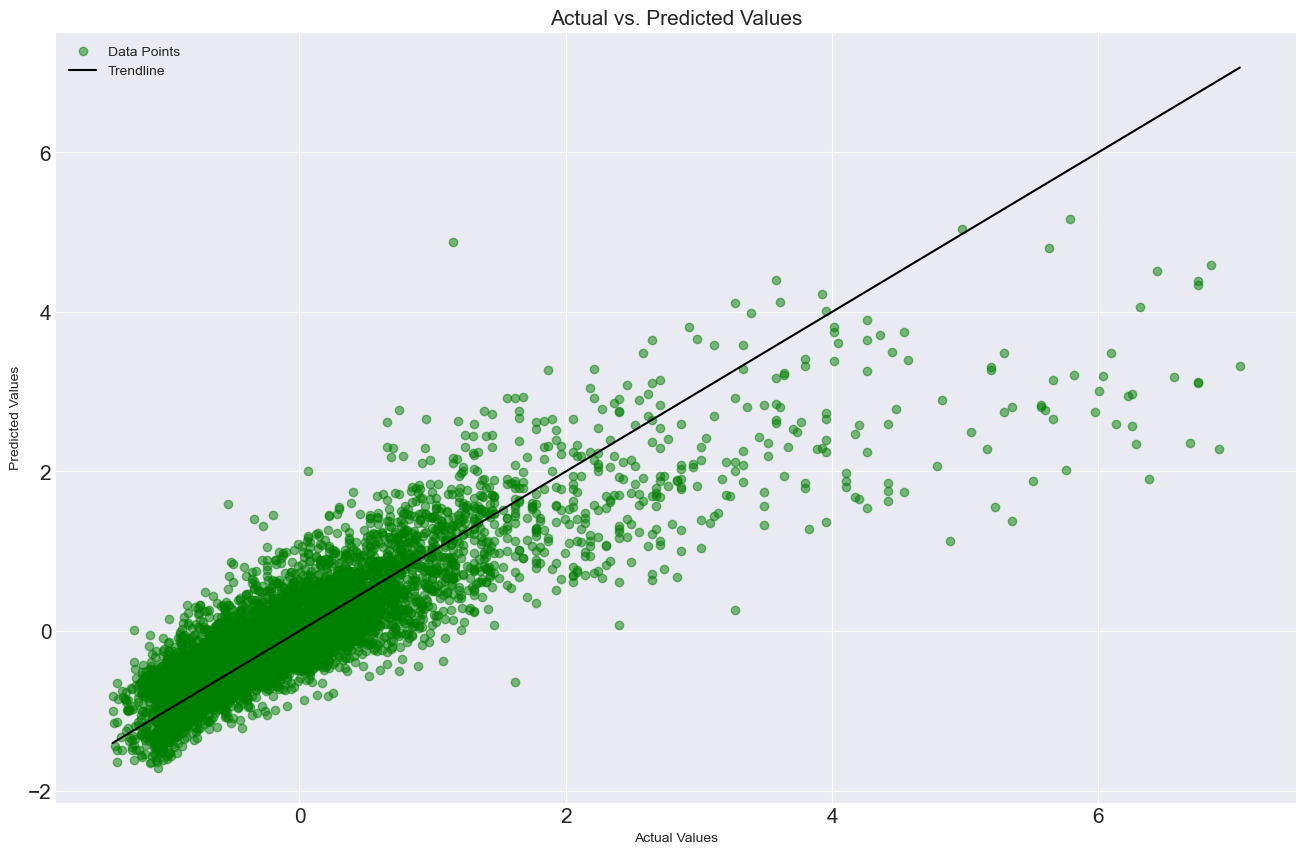

In [175]:

# Make predictions on the test set
y_pred = regression_model.predict(X_test)

# Create a scatter plot with green points and alpha of 0.5
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Data Points')

# Plot a trendline
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), color='black', label='Trendline')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


### DECISION_TREE_REG & RF_REG

In [176]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Random Forest
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

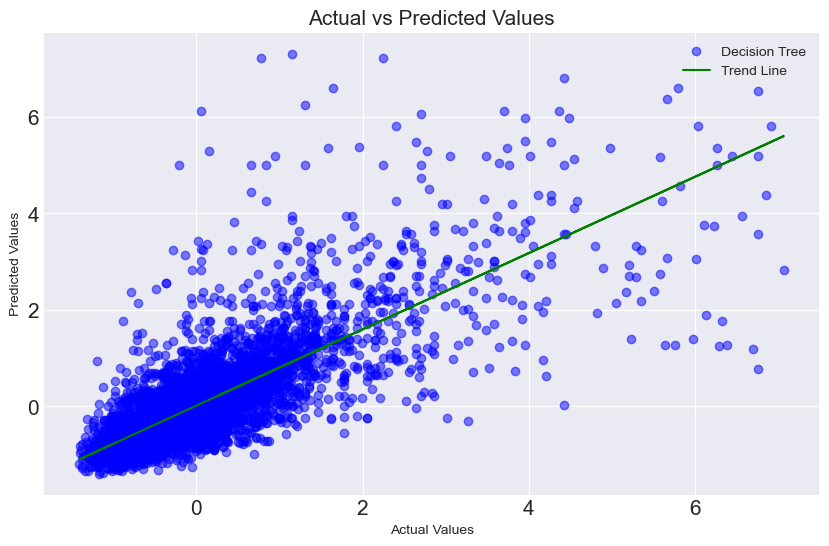

In [177]:


# Predict on the test data
dt_predictions = decision_tree_model.predict(X_test)

# Calculate the line of best fit
best_fit_line = np.polyfit(y_test, dt_predictions, 1)
best_fit_line_fn = np.poly1d(best_fit_line)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='blue', alpha=0.5, label='Decision Tree')

# Plot the trend line
plt.plot(y_test, best_fit_line_fn(y_test), color='green', label='Trend Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


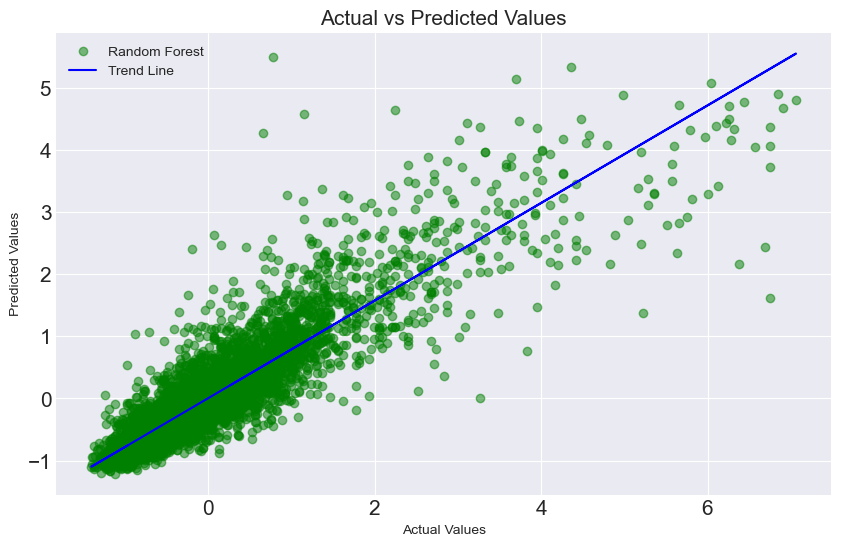

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test data
rf_predictions = random_forest_model.predict(X_test)

# Calculate the line of best fit
best_fit_line = np.polyfit(y_test, rf_predictions, 1)
best_fit_line_fn = np.poly1d(best_fit_line)

# Plot the predicted values against the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='green', alpha=0.5, label='Random Forest')

# Plot the trend line
plt.plot(y_test, best_fit_line_fn(y_test), color='blue', label='Trend Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [180]:
# Calculate metrics for Linear Regression on both train and test sets
linear_regression_predictions_train = regression_model.predict(X_train)
linear_regression_predictions_test = regression_model.predict(X_test)
linear_regression_mae_train = mean_absolute_error(y_train, linear_regression_predictions_train)
linear_regression_mae_test = mean_absolute_error(y_test, linear_regression_predictions_test)
linear_regression_mse_train = mean_squared_error(y_train, linear_regression_predictions_train)
linear_regression_mse_test = mean_squared_error(y_test, linear_regression_predictions_test)
linear_regression_r2_train = r2_score(y_train, linear_regression_predictions_train)
linear_regression_r2_test = r2_score(y_test, linear_regression_predictions_test)
linear_regression_rmse_train = np.sqrt(mean_squared_error(y_train, linear_regression_predictions_train))
linear_regression_rmse_test = np.sqrt(mean_squared_error(y_test, linear_regression_predictions_test))
linear_regression_mape_train = np.mean(np.abs((y_train - linear_regression_predictions_train) / y_train)) * 100
linear_regression_mape_test = np.mean(np.abs((y_test - linear_regression_predictions_test) / y_test)) * 100

# Calculate metrics for Decision Tree on both train and test sets
dt_predictions_train = decision_tree_model.predict(X_train)
dt_predictions_test = decision_tree_model.predict(X_test)
dt_mae_train = mean_absolute_error(y_train, dt_predictions_train)
dt_mae_test = mean_absolute_error(y_test, dt_predictions_test)
dt_mse_train = mean_squared_error(y_train, dt_predictions_train)
dt_mse_test = mean_squared_error(y_test, dt_predictions_test)
dt_r2_train = r2_score(y_train, dt_predictions_train)
dt_r2_test = r2_score(y_test, dt_predictions_test)
dt_rmse_train = np.sqrt(mean_squared_error(y_train, dt_predictions_train))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, dt_predictions_test))
dt_mape_train = np.mean(np.abs((y_train - dt_predictions_train) / y_train)) * 100
dt_mape_test = np.mean(np.abs((y_test - dt_predictions_test) / y_test)) * 100

# Calculate metrics for Random Forest on both train and test sets
rf_predictions_train = random_forest_model.predict(X_train)
rf_predictions_test = random_forest_model.predict(X_test)
rf_mae_train = mean_absolute_error(y_train, rf_predictions_train)
rf_mae_test = mean_absolute_error(y_test, rf_predictions_test)
rf_mse_train = mean_squared_error(y_train, rf_predictions_train)
rf_mse_test = mean_squared_error(y_test, rf_predictions_test)
rf_r2_train = r2_score(y_train, rf_predictions_train)
rf_r2_test = r2_score(y_test, rf_predictions_test)
rf_rmse_train = np.sqrt(mean_squared_error(y_train, rf_predictions_train))
rf_rmse_test = np.sqrt(mean_squared_error(y_test, rf_predictions_test))
rf_mape_train = np.mean(np.abs((y_train - rf_predictions_train) / y_train)) * 100
rf_mape_test = np.mean(np.abs((y_test - rf_predictions_test) / y_test)) * 100

print("Linear Regression:")
print("Train MAE:", linear_regression_mae_train)
print("Test MAE:", linear_regression_mae_test)
print("Train MSE:", linear_regression_mse_train)
print("Test MSE:", linear_regression_mse_test)
print("Train RMSE:", linear_regression_rmse_train)
print("Test RMSE:", linear_regression_rmse_test)
print("Train R2:", linear_regression_r2_train)
print("Test R2:", linear_regression_r2_test)
print("Train MAPE:", linear_regression_mape_train)
print("Test MAPE:", linear_regression_mape_test)
print()

# Print the metrics for Decision Tree
print("Decision Tree:")
print("Train MAE:", dt_mae_train)
print("Test MAE:", dt_mae_test)
print("Train MSE:", dt_mse_train)
print("Test MSE:", dt_mse_test)
print("Train RMSE:", dt_rmse_train)
print("Test RMSE:", dt_rmse_test)
print("Train R2:", dt_r2_train)
print("Test R2:", dt_r2_test)
print("Train MAPE:", dt_mape_train)
print("Test MAPE:", dt_mape_test)
print()

# Print the metrics for Random Forest
print("Random Forest:")
print("Train MAE:", rf_mae_train)
print("Test MAE:", rf_mae_test)
print("Train MSE:", rf_mse_train)
print("Test MSE:", rf_mse_test)
print("Train RMSE:", rf_rmse_train)
print("Test RMSE:", rf_rmse_test)
print("Train R2:", rf_r2_train)
print("Test R2:", rf_r2_test)
print("Train MAPE:", rf_mape_train)
print("Test MAPE:", rf_mape_test)

Linear Regression:
Train MAE: 0.3445648423093868
Test MAE: 0.33939630025042095
Train MSE: 0.2684411171563524
Test MSE: 0.2616902188124334
Train RMSE: 0.5181130351152655
Test RMSE: 0.5115566623673602
Train R2: 0.7307386603114516
Test R2: 0.7400751495867044
Train MAPE: 268.9482316240702
Test MAPE: 252.68368529351838

Decision Tree:
Train MAE: 0.0005277132908929394
Test MAE: 0.3847791015284894
Train MSE: 0.0001230728422951637
Test MSE: 0.4294661976103265
Train RMSE: 0.011093820004631574
Test RMSE: 0.6553367055264999
Train R2: 0.9998765511083149
Test R2: 0.5734309915058724
Train MAPE: 0.5049797224563277
Test MAPE: 407.73595030142246

Random Forest:
Train MAE: 0.10451417797893463
Test MAE: 0.2739113666643367
Train MSE: 0.030112347831016645
Test MSE: 0.2011419469404795
Train RMSE: 0.17352909793754084
Test RMSE: 0.4484885137219007
Train R2: 0.9697956438118063
Test R2: 0.8002149613860188
Train MAPE: 90.03286255458707
Test MAPE: 323.9943567426727


In [181]:


# Create a dictionary to store the model metrics
model_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train MAE': [linear_regression_mae_train, dt_mae_train, rf_mae_train],
    'Test MAE': [linear_regression_mae_test, dt_mae_test, rf_mae_test],
    'Train MSE': [linear_regression_mse_train, dt_mse_train, rf_mse_train],
    'Test MSE': [linear_regression_mse_test, dt_mse_test, rf_mse_test],
    'Train RMSE': [linear_regression_rmse_train, dt_rmse_train, rf_rmse_train],
    'Test RMSE': [linear_regression_rmse_test, dt_rmse_test, rf_rmse_test],
    'Train R2': [linear_regression_r2_train, dt_r2_train, rf_r2_train],
    'Test R2': [linear_regression_r2_test, dt_r2_test, rf_r2_test],
    'Train MAPE': [linear_regression_mape_train, dt_mape_train, rf_mape_train],
    'Test MAPE': [linear_regression_mape_test, dt_mape_test, rf_mape_test]
}

# Create a DataFrame from the model metrics dictionary
metrics_df = pd.DataFrame(model_metrics)

# Set the 'Model' column as the index
metrics_df.set_index('Model', inplace=True)

# Display the model comparison table
print("Model Comparison Table:")
print(metrics_df)


Model Comparison Table:
                   Train MAE  Test MAE  Train MSE  Test MSE  Train RMSE  \
Model                                                                     
Linear Regression   0.344565  0.339396   0.268441  0.261690    0.518113   
Decision Tree       0.000528  0.384779   0.000123  0.429466    0.011094   
Random Forest       0.104514  0.273911   0.030112  0.201142    0.173529   

                   Test RMSE  Train R2   Test R2  Train MAPE   Test MAPE  
Model                                                                     
Linear Regression   0.511557  0.730739  0.740075  268.948232  252.683685  
Decision Tree       0.655337  0.999877  0.573431    0.504980  407.735950  
Random Forest       0.448489  0.969796  0.800215   90.032863  323.994357  


### Conclusion
Mean Absolute Error (MAE):

Random Forest has the lowest MAE (0.2739), indicating that, on average, its predictions are closest to the actual values.
Linear Regression has a slightly higher MAE (0.3393), followed by Decision Tree with the highest MAE (0.3847).

###Mean Squared Error (MSE):

Random Forest has the lowest MSE (0.2011), indicating that its predictions have the smallest overall squared difference from the actual values.
Linear Regression has a higher MSE (0.2616), followed by Decision Tree with the highest MSE (0.4294).

###R-squared Score (R2):


Random Forest has the highest R-squared score (0.8002), indicating that it explains a larger proportion of the variance in the target variable compared to the other models.
Linear Regression has a moderately high R-squared score (0.7400), followed by Decision Tree with a lower score (0.5734). 

### Therefore, based on these metrics, it can be inferred that the Random Forest model outperforms Linear Regression and Decision Tree in terms of accuracy and overall performance. 

In [185]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
# Fit the model to the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the train set
train_predictions_gb = gradient_boosting_model.predict(X_train)
# Make predictions on the test set
test_predictions_gb = gradient_boosting_model.predict(X_test)

# Calculate metrics for train set
train_mae_gb = mean_absolute_error(y_train, train_predictions_gb)
train_mape_gb = np.sqrt(mean_absolute_error(y_train, train_predictions_gb))
train_mse_gb = mean_squared_error(y_train, train_predictions_gb)
train_rmse_gb = np.sqrt(train_mse_gb)
train_r2_gb = r2_score(y_train, train_predictions_gb)

# Calculate metrics for test set
test_mae_gb = mean_absolute_error(y_test, test_predictions_gb)
test_mape_gb = np.sqrt(mean_absolute_error(y_test, test_predictions_gb))
test_mse_gb = mean_squared_error(y_test, test_predictions_gb)
test_rmse_gb = np.sqrt(test_mse_gb)
test_r2_gb = r2_score(y_test, test_predictions_gb)

# Print the train results
print("Train MAE (Gradient Boosting):", round(train_mae_gb, 4))
print("Train MAPE (Gradient Boosting):", round(train_mape_gb, 4))
print("Train MSE (Gradient Boosting):", round(train_mse_gb, 4))
print("Train RMSE (Gradient Boosting):", round(train_rmse_gb, 4))
print("Train R2 (Gradient Boosting):", round(train_r2_gb, 4))

# Print the test results
print("Test MAE (Gradient Boosting):", round(test_mae_gb, 4))
print("Test MAPE (Gradient Boosting):", round(test_mape_gb, 4))
print("Test MSE (Gradient Boosting):", round(test_mse_gb, 4))
print("Test RMSE (Gradient Boosting):", round(test_rmse_gb, 4))
print("Test R2 (Gradient Boosting):", round(test_r2_gb, 4))

# Create the Bagging Regression model
bagging_model = BaggingRegressor(random_state=42)
# Fit the model to the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the train set
train_predictions_bagging = bagging_model.predict(X_train)
# Make predictions on the test set
test_predictions_bagging = bagging_model.predict(X_test)

# Calculate metrics for train set
train_mae_bagging = mean_absolute_error(y_train, train_predictions_bagging)
train_mape_bagging = np.sqrt(mean_absolute_error(y_train, train_predictions_bagging))
train_mse_bagging = mean_squared_error(y_train, train_predictions_bagging)
train_rmse_bagging = np.sqrt(train_mse_bagging)
train_r2_bagging = r2_score(y_train, train_predictions_bagging)

# Calculate metrics for test set
test_mae_bagging = mean_absolute_error(y_test, test_predictions_bagging)
test_mape_bagging = np.sqrt(mean_absolute_error(y_test, test_predictions_bagging))
test_mse_bagging = mean_squared_error(y_test, test_predictions_bagging)
test_rmse_bagging = np.sqrt(test_mse_bagging)
test_r2_bagging = r2_score(y_test, test_predictions_bagging)
print()
# Print the train results
print("Train MAE (Bagging Regression):", round(train_mae_bagging, 4))
print("Train MAPE (Bagging Regression):", round(train_mape_bagging, 4))
print("Train MSE (Bagging Regression):", round(train_mse_bagging, 4))
print("Train RMSE (Bagging Regression):", round(train_rmse_bagging, 4))
print("Train R2 (Bagging Regression):", round(train_r2_bagging, 4))

# Print the test results
print("Test MAE (Bagging Regression):", round(test_mae_bagging, 4))
print("Test MAPE (Bagging Regression):", round(test_mape_bagging, 4))
print("Test MSE (Bagging Regression):", round(test_mse_bagging, 4))
print("Test RMSE (Bagging Regression):", round(test_rmse_bagging, 4))
print("Test R2 (Bagging Regression):", round(test_r2_bagging, 4))



Train MAE (Gradient Boosting): 0.3024
Train MAPE (Gradient Boosting): 0.5499
Train MSE (Gradient Boosting): 0.1981
Train RMSE (Gradient Boosting): 0.445
Train R2 (Gradient Boosting): 0.8013
Test MAE (Gradient Boosting): 0.3055
Test MAPE (Gradient Boosting): 0.5527
Test MSE (Gradient Boosting): 0.2134
Test RMSE (Gradient Boosting): 0.4619
Test R2 (Gradient Boosting): 0.7881

Train MAE (Bagging Regression): 0.1187
Train MAPE (Bagging Regression): 0.3446
Train MSE (Bagging Regression): 0.0428
Train RMSE (Bagging Regression): 0.207
Train R2 (Bagging Regression): 0.957
Test MAE (Bagging Regression): 0.2873
Test MAPE (Bagging Regression): 0.536
Test MSE (Bagging Regression): 0.2235
Test RMSE (Bagging Regression): 0.4728
Test R2 (Bagging Regression): 0.778
